In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
path = "D:/WINTER 2024/HACK DIVERISTY/FELLOW_2024/wholesale_diamonds_2012_2023.csv" 
diamond_df = pd.read_csv(path)
diamond_df

,index,carat,cut,color,clarity,depth,table,cost (dollars),length (mm),width (mm),height (mm),year
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2012
1,1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2012
2,2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2012
3,3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2012
4,4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
407275,33935,0.72,Ideal,D,SI1,60.8,57.0,3394,5.75,5.76,3.50,2023
407276,33936,0.72,Good,D,SI1,63.1,55.0,3256,5.69,5.75,3.61,2023
407277,33937,0.70,Very Good,D,SI1,62.8,60.0,3569,5.66,5.68,3.56,2023
407278,33938,0.86,Premium,H,SI2,61.0,58.0,4022,6.15,6.12,3.74,2023


In [3]:
diamond_df=diamond_df.rename(columns={'cost (dollars)': 'cost_dollars',
                      'length (mm)': 'length_mm',
                      'width (mm)': 'width_mm',
                      'height (mm)': 'height_mm'})
diamond_df

,index,carat,cut,color,clarity,depth,table,cost_dollars,length_mm,width_mm,height_mm,year
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2012
1,1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2012
2,2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2012
3,3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2012
4,4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
407275,33935,0.72,Ideal,D,SI1,60.8,57.0,3394,5.75,5.76,3.50,2023
407276,33936,0.72,Good,D,SI1,63.1,55.0,3256,5.69,5.75,3.61,2023
407277,33937,0.70,Very Good,D,SI1,62.8,60.0,3569,5.66,5.68,3.56,2023
407278,33938,0.86,Premium,H,SI2,61.0,58.0,4022,6.15,6.12,3.74,2023


In [4]:
diamond_df = diamond_df.dropna(subset=['carat'])
diamond_df

,index,carat,cut,color,clarity,depth,table,cost_dollars,length_mm,width_mm,height_mm,year
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2012
1,1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2012
2,2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2012
3,3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2012
4,4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
407275,33935,0.72,Ideal,D,SI1,60.8,57.0,3394,5.75,5.76,3.50,2023
407276,33936,0.72,Good,D,SI1,63.1,55.0,3256,5.69,5.75,3.61,2023
407277,33937,0.70,Very Good,D,SI1,62.8,60.0,3569,5.66,5.68,3.56,2023
407278,33938,0.86,Premium,H,SI2,61.0,58.0,4022,6.15,6.12,3.74,2023


In [5]:
total_nans = diamond_df.isna().sum().sum()
print(f"Total NaNs in DataFrame: {total_nans}")
# Find rows with at least one NaN value
rows_with_nans = diamond_df[diamond_df.isna().any(axis=1)]

# Display the rows with NaNs
print(rows_with_nans)

Total NaNs in DataFrame: 0
Empty DataFrame
Columns: [index, carat, cut, color, clarity, depth, table, cost_dollars, length_mm, width_mm, height_mm, year]
Index: []


In [6]:
diamond_df = diamond_df[diamond_df['cost_dollars'] != 0]
diamond_df = diamond_df[diamond_df['cost_dollars'] >= 0]
diamond_df

,index,carat,cut,color,clarity,depth,table,cost_dollars,length_mm,width_mm,height_mm,year
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2012
1,1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2012
2,2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2012
3,3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2012
4,4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
407275,33935,0.72,Ideal,D,SI1,60.8,57.0,3394,5.75,5.76,3.50,2023
407276,33936,0.72,Good,D,SI1,63.1,55.0,3256,5.69,5.75,3.61,2023
407277,33937,0.70,Very Good,D,SI1,62.8,60.0,3569,5.66,5.68,3.56,2023
407278,33938,0.86,Premium,H,SI2,61.0,58.0,4022,6.15,6.12,3.74,2023


In [7]:
diamond_df.drop(['year','index'], axis=1, inplace=True)

# Detecting and creating a sub-dataframe for outliers

In [8]:
# Detect outliers using z-score
z_scores = (diamond_df - diamond_df.mean()) / diamond_df.std()
outliers = diamond_df[(z_scores.abs() > 3).any(axis=1)]

# Alternatively, detect outliers using IQR method
Q1 = diamond_df.quantile(0.25)
Q3 = diamond_df.quantile(0.75)
IQR = Q3 - Q1
outliers = diamond_df[((diamond_df < (Q1 - 1.5 * IQR)) | (diamond_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Create a sub-dataframe of outliers
outliers_df = diamond_df.loc[outliers.index]

# Print or further analyze the outliers dataframe
print(outliers_df)


C:\Users\rhoda\AppData\Local\Temp\ipykernel_22104\366003874.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = (diamond_df - diamond_df.mean()) / diamond_df.std()
C:\Users\rhoda\AppData\Local\Temp\ipykernel_22104\366003874.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = (diamond_df - diamond_df.mean()) / diamond_df.std()
C:\Users\rhoda\AppData\Local\Temp\ipykernel_22104\366003874.py:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will defaul

        carat        cut color clarity  depth  table  cost_dollars  length_mm  \
1        0.23       Good     E     VS1   56.9   65.0           327       4.05   
16       0.31  Very Good     J     SI1   58.1   62.0           353       4.44   
60       0.86       Fair     E     SI2   55.1   69.0          2757       6.45   
63       0.96       Fair     F     SI2   66.3   62.0          2759       6.27   
81       0.91       Fair     H     SI2   65.7   60.0          2763       6.03   
...       ...        ...   ...     ...    ...    ...           ...        ...   
407235   1.00       Fair     I     SI2   66.8   56.0          3909       6.22   
407248   0.70       Good     D     VS2   58.0   62.0          3328       5.78   
407250   0.73       Good     E     SI1   57.9   55.0          3487       6.00   
407254   0.70       Good     F     VS1   57.8   61.0          3646       5.83   
407270   0.79       Good     F     SI1   58.1   59.0          3402       6.06   

        width_mm  height_mm

C:\Users\rhoda\AppData\Local\Temp\ipykernel_22104\366003874.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = diamond_df[((diamond_df < (Q1 - 1.5 * IQR)) | (diamond_df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
outliers_df

# Saving the dataframe without outliers

In [9]:
diamond_df_cleaned = diamond_df.drop(outliers.index)

# Save the cleaned dataframe to a CSV file
diamond_df_cleaned.to_csv('diamond_data_cleaned.csv', index=False)

In [ ]:
diamond_df_cleaned

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [11]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error, r2_score
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn import tree

In [12]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, explained_variance_score

In [242]:
# create a list containing predictors' name
predictors = ['carat', 'cut', 'color', 'depth', 'table', 'length_mm', 'width_mm', 'height_mm', 'clarity']
print(predictors)

['carat', 'cut', 'color', 'depth', 'table', 'length_mm', 'width_mm', 'height_mm', 'clarity']


In [243]:
# define outcome/target variable
outcome = 'cost_dollars'
print(outcome)

cost_dollars


In [244]:
x = diamond_df[predictors]
y = diamond_df[outcome]

In [245]:
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.3, random_state=1)
train_x.head()

,carat,cut,color,depth,table,length_mm,width_mm,height_mm,clarity
95194,0.39,Ideal,E,61.50,55.50,4.68,4.72,2.88,IF
238002,1.03,Good,J,63.60,57.00,6.38,6.29,4.03,SI1
165592,0.62,Very Good,I,63.10,58.00,5.40,5.44,3.42,VVS1
179728,1.01,Good,F,63.90,58.00,6.39,6.32,4.06,VS2
65419,0.71,Premium,G,62.10,58.00,5.72,5.68,3.54,SI2


In [17]:
# pre-processing for numerical and categorical data
numerical_cols = ['carat', 'depth', 'table', 'length_mm', 'width_mm', 'height_mm']
categorical_cols = ['cut', 'color', 'clarity']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])


# Random Forest Regressor

In [18]:
# Initialize the Random Forest Regressor
RFmodel = RandomForestRegressor(n_estimators=100, random_state=42)

RFpipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RFmodel)])


In [19]:
# Fit the model to the training data
RFpipeline.fit(train_x, train_y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'length_mm', 'width_mm',
                                                   'height_mm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [20]:
# Make predictions on the training set
train_y_pred_RF = RFpipeline.predict(train_x)

In [21]:
# Make predictions on the validation set
valid_y_pred_RF = RFpipeline.predict(valid_x)

In [22]:
# Evaluate the model #regression tree performance
regressionSummary(train_y, RFpipeline.predict(train_x))
regressionSummary(valid_y, RFpipeline.predict(valid_x))


Regression statistics

                      Mean Error (ME) : 0.3535
       Root Mean Squared Error (RMSE) : 357.1836
            Mean Absolute Error (MAE) : 226.6080
          Mean Percentage Error (MPE) : -0.6414
Mean Absolute Percentage Error (MAPE) : 6.7008

Regression statistics

                      Mean Error (ME) : 1.2652
       Root Mean Squared Error (RMSE) : 409.0016
            Mean Absolute Error (MAE) : 258.8452
          Mean Percentage Error (MPE) : -0.7318
Mean Absolute Percentage Error (MAPE) : 7.6090


In [23]:
#Calculate mean squared error, training
mse = mean_squared_error(train_y, train_y_pred_RF)
r2 = r2_score(train_y, train_y_pred_RF)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 127580.1415939147
R-squared: 0.986634417189222


In [24]:
#Calculate mean squared error, validation
mse = mean_squared_error(valid_y, valid_y_pred_RF)
r2 = r2_score(valid_y, valid_y_pred_RF)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 167282.28130277514
R-squared: 0.9824196618640749


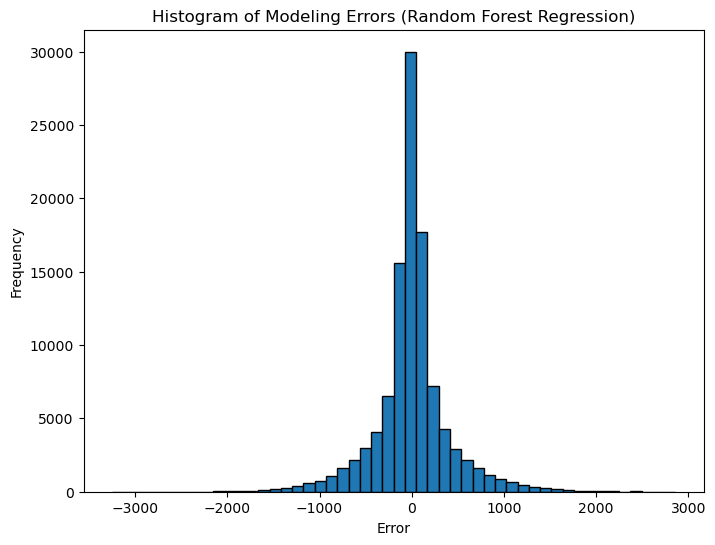

In [25]:
# Calculate modeling errors
errors = valid_y - valid_y_pred_RF

# Plot histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Histogram of Modeling Errors (Random Forest Regression)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# Model 2: XBGRegressor

In [ ]:
#!pip install xgboost

In [26]:
from xgboost import XGBRegressor

In [27]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', xgb_model)])

In [28]:
# Fit the model to the training data
xgb_pipeline.fit(train_x, train_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'length_mm', 'width_mm',
                                                   'height_mm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              ea...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [29]:
# Make predictions on the training set
train_y_pred_xgb = xgb_pipeline.predict(train_x)

In [30]:
# Make predictions on the validation set
valid_y_pred_xgb = xgb_pipeline.predict(valid_x)

In [31]:
# Evaluate the model #regression tree performance
regressionSummary(train_y, xgb_pipeline.predict(train_x))
regressionSummary(valid_y, xgb_pipeline.predict(valid_x))


Regression statistics

                      Mean Error (ME) : -0.0013
       Root Mean Squared Error (RMSE) : 506.0241
            Mean Absolute Error (MAE) : 317.0495
          Mean Percentage Error (MPE) : -1.7890
Mean Absolute Percentage Error (MAPE) : 10.0038

Regression statistics

                      Mean Error (ME) : 0.4846
       Root Mean Squared Error (RMSE) : 514.0996
            Mean Absolute Error (MAE) : 320.3575
          Mean Percentage Error (MPE) : -1.8096
Mean Absolute Percentage Error (MAPE) : 10.0814


In [32]:
#Calculate mean squared error, training
mse = mean_squared_error(train_y, train_y_pred_xgb)
r2 = r2_score(train_y, train_y_pred_xgb)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 256060.43759988775
R-squared: 0.9731745321760279


In [33]:
#Calculate mean squared error, validation
mse = mean_squared_error(valid_y, valid_y_pred_xgb)
r2 = r2_score(valid_y, valid_y_pred_xgb)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 264298.3527611116
R-squared: 0.9722238698915252


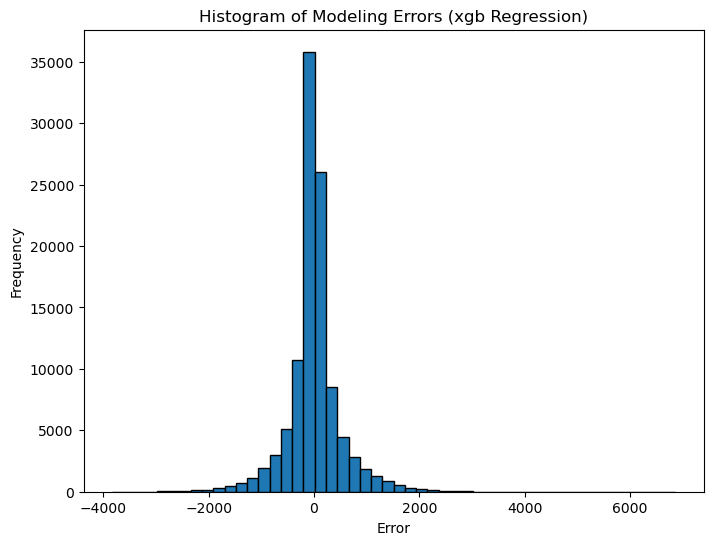

In [34]:
# Calculate modeling errors
errors = valid_y - valid_y_pred_xgb

# Plot histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Histogram of Modeling Errors (xgb Regression)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# Model 3: LightGBMRegressor

In [35]:
#!pip install lightgbm
from lightgbm import LGBMRegressor

# new model
lgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# new pipeline
lgbm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', lgbm_model)])

In [36]:
# Fit the model to the training data
lgbm_pipeline.fit(train_x, train_y)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 249009, number of used features: 26
[LightGBM] [Info] Start training from score 3472.400459


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'length_mm', 'width_mm',
                                                   'height_mm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('model', LGBMRegressor(random_state=42))])

In [37]:
# Make predictions on the training set
train_y_pred_lgbm = lgbm_pipeline.predict(train_x)

In [38]:
# Make predictions on the validation set
valid_y_pred_lgbm = lgbm_pipeline.predict(valid_x)

In [39]:
# Evaluate the model #regression performance
regressionSummary(train_y, lgbm_pipeline.predict(train_x))
regressionSummary(valid_y, lgbm_pipeline.predict(valid_x))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 503.4477
            Mean Absolute Error (MAE) : 317.8361
          Mean Percentage Error (MPE) : -1.9529
Mean Absolute Percentage Error (MAPE) : 10.2175

Regression statistics

                      Mean Error (ME) : 1.1403
       Root Mean Squared Error (RMSE) : 509.6615
            Mean Absolute Error (MAE) : 320.0765
          Mean Percentage Error (MPE) : -1.9517
Mean Absolute Percentage Error (MAPE) : 10.2617


In [40]:
#Calculate mean squared error, training
mse = mean_squared_error(train_y, train_y_pred_lgbm)
r2 = r2_score(train_y, train_y_pred_lgbm)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 253459.62269686296
R-squared: 0.973446999399591


In [41]:
#Calculate mean squared error, validation
mse = mean_squared_error(valid_y, valid_y_pred_lgbm)
r2 = r2_score(valid_y, valid_y_pred_lgbm)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 259754.87710051172
R-squared: 0.9727013612181835


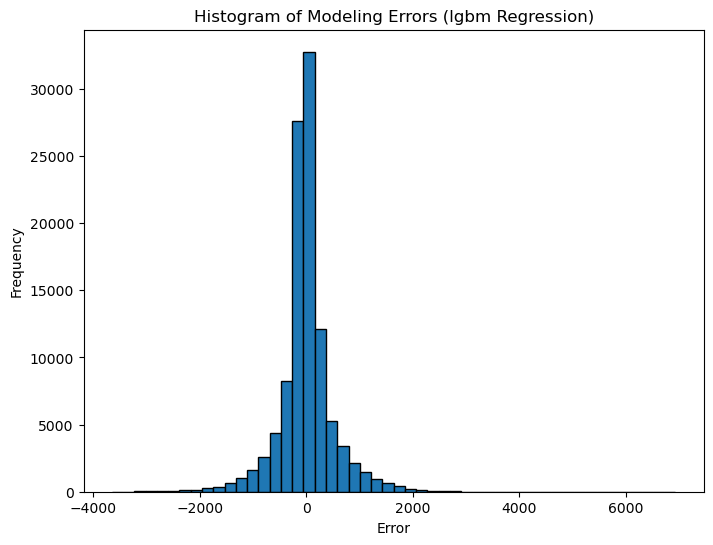

In [42]:
# Calculate modeling errors
errors = valid_y - valid_y_pred_lgbm

# Plot histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Histogram of Modeling Errors (lgbm Regression)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# Model 4: KNN

In [43]:
from sklearn.neighbors import KNeighborsRegressor

In [44]:
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can tune this parameter

knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),  # Assuming preprocessor is defined
                               ('scaler', StandardScaler()),    # Standardize features
                               ('model', knn_model)])

In [45]:
# Fit the model to the training data
knn_pipeline.fit(train_x, train_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'length_mm', 'width_mm',
                                                   'height_mm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('scaler', StandardScaler()),
                ('model', KNeighborsRegressor())])

In [46]:
# Make predictions on the training set
train_y_pred_knn = knn_pipeline.predict(train_x)

In [47]:
# Make predictions on the validation set
valid_y_pred_knn = knn_pipeline.predict(valid_x)

In [48]:
# Evaluate the model #regression performance
regressionSummary(train_y, knn_pipeline.predict(train_x))
regressionSummary(valid_y, knn_pipeline.predict(valid_x))


Regression statistics

                      Mean Error (ME) : 0.6031
       Root Mean Squared Error (RMSE) : 375.4074
            Mean Absolute Error (MAE) : 235.2227
          Mean Percentage Error (MPE) : -0.6430
Mean Absolute Percentage Error (MAPE) : 6.9354

Regression statistics

                      Mean Error (ME) : 2.6719
       Root Mean Squared Error (RMSE) : 423.8383
            Mean Absolute Error (MAE) : 266.0579
          Mean Percentage Error (MPE) : -0.7283
Mean Absolute Percentage Error (MAPE) : 7.8031


In [49]:
#Calculate mean squared error, training
mse = mean_squared_error(train_y, train_y_pred_knn)
r2 = r2_score(train_y, train_y_pred_knn)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 140930.73251376455
R-squared: 0.9852357792328538


In [50]:
#Calculate mean squared error, validation
mse = mean_squared_error(valid_y, valid_y_pred_knn)
r2 = r2_score(valid_y, valid_y_pred_knn)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 179638.91156288947
R-squared: 0.9811210560792804


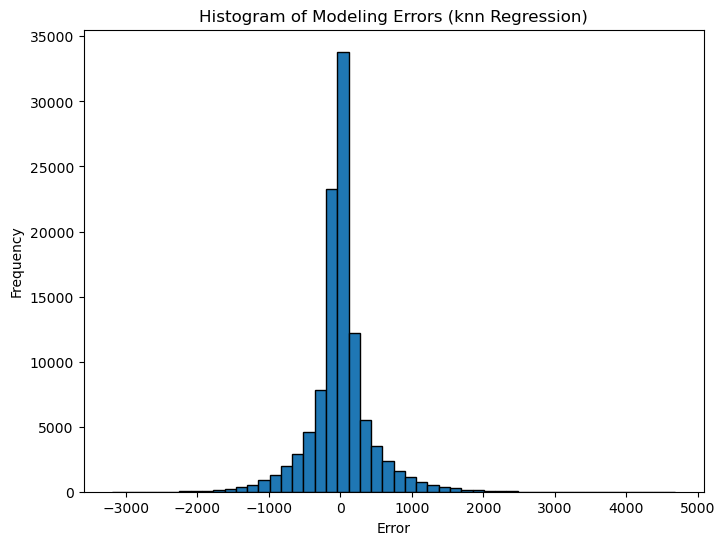

In [51]:
# Calculate modeling errors
errors = valid_y - valid_y_pred_knn

# Plot histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Histogram of Modeling Errors (knn Regression)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# Model 5: Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
#Initialise the model
linear_model = LinearRegression()

linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor),  # Assuming preprocessor is defined
                                  ('scaler', StandardScaler()),    # Standardize features
                                  ('model', linear_model)])


In [54]:
# Fit the model to the training data
linear_pipeline.fit(train_x, train_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'length_mm', 'width_mm',
                                                   'height_mm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [55]:
# Make predictions on the training set
train_y_pred_LR = linear_pipeline.predict(train_x)

In [56]:
# Make predictions on the validation set
valid_y_pred_LR = linear_pipeline.predict(valid_x)

In [57]:
# Evaluate the model #regression performance
regressionSummary(train_y, linear_pipeline.predict(train_x))
regressionSummary(valid_y, linear_pipeline.predict(valid_x))


Regression statistics

                      Mean Error (ME) : -2.7388
       Root Mean Squared Error (RMSE) : 892.8665
            Mean Absolute Error (MAE) : 619.1259
          Mean Percentage Error (MPE) : 3.6070
Mean Absolute Percentage Error (MAPE) : 31.9491

Regression statistics

                      Mean Error (ME) : -5.7823
       Root Mean Squared Error (RMSE) : 887.4504
            Mean Absolute Error (MAE) : 614.3891
          Mean Percentage Error (MPE) : 3.6412
Mean Absolute Percentage Error (MAPE) : 31.8702


In [58]:
#Calculate mean squared error, training
mse = mean_squared_error(train_y, train_y_pred_LR)
r2 = r2_score(train_y, train_y_pred_LR)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 797210.5365090773
R-squared: 0.916482429708754


In [59]:
#Calculate mean squared error, validation
mse = mean_squared_error(valid_y, valid_y_pred_LR)
r2 = r2_score(valid_y, valid_y_pred_LR)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 787568.1631543122
R-squared: 0.9172314335653877


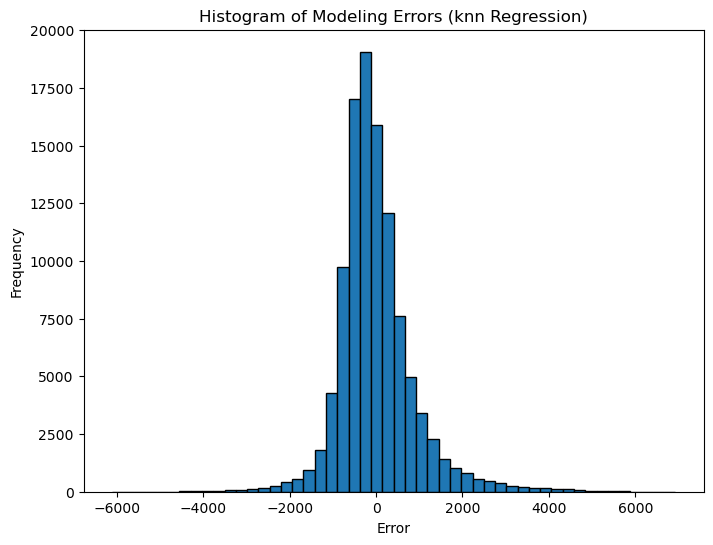

In [60]:
# Calculate modeling errors
errors = valid_y - valid_y_pred_LR

# Plot histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Histogram of Modeling Errors (knn Regression)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

In [61]:
#Linear regression model of price vs. diamond attributes using Statmodels 
# run a linear regression of Price on the remaining predictors in the training set
train_df = train_x.join(train_y)
print(train_df.head())

        carat        cut color  depth  table  length_mm  width_mm  height_mm  \
95194    0.39      Ideal     E   61.5   55.5       4.68      4.72       2.88   
238002   1.03       Good     J   63.6   57.0       6.38      6.29       4.03   
165592   0.62  Very Good     I   63.1   58.0       5.40      5.44       3.42   
179728   1.01       Good     F   63.9   58.0       6.39      6.32       4.06   
65419    0.71    Premium     G   62.1   58.0       5.72      5.68       3.54   

       clarity  cost_dollars  
95194       IF          1557  
238002     SI1          3250  
165592    VVS1          1939  
179728     VS2          6799  
65419      SI2          1964  


In [62]:
# create the linear model formula
#string_name.join(iterable); returns a string concatenated with the elements of iterable
formula = 'cost_dollars ~ ' + ' + '.join(predictors)
formula

'cost_dollars ~ carat + cut + color + depth + table + length_mm + width_mm + height_mm + clarity'

In [63]:
import statsmodels.formula.api as sm

In [64]:
# build the linear model
linear_pipeline = sm.ols(formula=formula, data=train_df).fit()
linear_pipeline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           cost_dollars   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 1.188e+05
Date:                Thu, 15 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:13:20   Log-Likelihood:            -2.0452e+06
No. Observations:              249009   AIC:                         4.090e+06
Df Residuals:                  248985   BIC:                         4.091e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -362.2526    303.224     -1.195      0.232    -956.563     232.058
cut[T.Good]        206.2821     22.401      9.209      0.000     162.377     250.187
cut[T.Ideal]       391.0294     22.212     17.604      0.000     347.494     434.565
cut[T.Premium]     349.6206     22.092     15.826      0.000     306.321     392.920
cut[T.Very Good]   286.6942     22.104     12.970      0.000     243.372     330.017
color[T.E]        -177.4514      6.475    -27.405      0.000    -190.142    -164.760
color[T.F]        -244.8869      6.602    -37.095      0.000    -257.826    -231.948
color[T.G]        -385.3780      6.425    -59.978      0.000    -397.971    -372.785
color[T.H]        -801.9071      6.878   -116.595      0.000    -815.387    -788.427
color[T.I]       -1271.6814      7.879   -161.405      0.000   -1287.124   -1256.239
color[T.J]       -2012.8995      9.909   -203.131      0.000   -2032.322   -1993.477
clarity[T.IF]     4056.7110     20.839    194.668      0.000    4015.867    4097.555
clarity[T.SI1]    2727.2444     18.458    147.752      0.000    2691.067    2763.422
clarity[T.SI2]    1906.7684     18.576    102.647      0.000    1870.360    1943.177
clarity[T.VS1]    3545.3016     18.742    189.159      0.000    3508.567    3582.036
clarity[T.VS2]    3241.9324     18.520    175.054      0.000    3205.635    3278.230
clarity[T.VVS1]   3869.0630     19.476    198.660      0.000    3830.891    3907.235
clarity[T.VVS2]   3906.7022     19.131    204.207      0.000    3869.206    3944.199
carat             1.212e+04     31.109    389.585      0.000    1.21e+04    1.22e+04
depth               17.5592      4.417      3.975      0.000       8.902      26.216
table              -26.3951      1.173    -22.512      0.000     -28.693     -24.097
length_mm        -1461.7482     43.576    -33.544      0.000   -1547.157   -1376.340
width_mm          1121.0895     44.109     25.416      0.000    1034.637    1207.542
height_mm        -1561.4774     68.896    -22.664      0.000   -1696.512   -1426.442
==============================================================================
Omnibus:                    67541.261   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           362891.366
Skew:                           1.206   Prob(JB):                         0.00
Kurtosis:                       8.400   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Decision Tree Regressor

In [140]:
decision_tree_model = DecisionTreeRegressor()  

decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming preprocessor is defined
    ('scaler', StandardScaler()),    # Standardize features if necessary
    ('model', decision_tree_model)
])

In [141]:
# Fit the model to the training data
decision_tree_pipeline.fit(train_x, train_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'length_mm', 'width_mm',
                                                   'height_mm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('scaler', StandardScaler()),
                ('model', DecisionTreeRegressor())])

In [142]:
# Make predictions on the training set
train_y_pred_DT = decision_tree_pipeline.predict(train_x)

In [143]:
# Make predictions on the validation set
valid_y_pred_DT = decision_tree_pipeline.predict(valid_x)

In [144]:
# Evaluate the model #regression performance
regressionSummary(train_y, decision_tree_pipeline.predict(train_x))
regressionSummary(valid_y, decision_tree_pipeline.predict(valid_x))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 356.8381
            Mean Absolute Error (MAE) : 226.3633
          Mean Percentage Error (MPE) : -0.6430
Mean Absolute Percentage Error (MAPE) : 6.6965

Regression statistics

                      Mean Error (ME) : 0.7595
       Root Mean Squared Error (RMSE) : 408.8684
            Mean Absolute Error (MAE) : 258.7357
          Mean Percentage Error (MPE) : -0.7322
Mean Absolute Percentage Error (MAPE) : 7.6060


In [145]:
#Calculate mean squared error, training
mse = mean_squared_error(train_y, train_y_pred_DT)
r2 = r2_score(train_y, train_y_pred_DT)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 127333.39500125444
R-squared: 0.9866602669176849


In [146]:
#Calculate mean squared error, validation
mse = mean_squared_error(valid_y, valid_y_pred_DT)
r2 = r2_score(valid_y, valid_y_pred_DT)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 167173.3973626052
R-squared: 0.9824311048960018


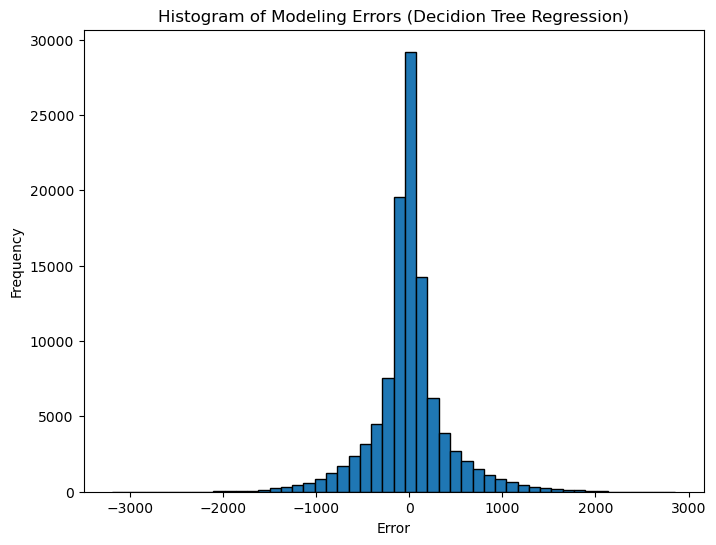

In [147]:
# Calculate modeling errors
errors = valid_y - valid_y_pred_DT

# Plot histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Histogram of Modeling Errors (Decidion Tree Regression)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# Prediction on new data

In [132]:
new_path = "D:/WINTER 2024/HACK DIVERISTY/FELLOW_2024/diamonds_for_sale_2024.csv" 

df2024 = pd.read_csv(new_path)
df2024

,index,carat,cut,color,clarity,depth,table,length (mm),width (mm),height (mm),year
0,0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,2024
1,1,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,2024
2,2,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,2024
3,3,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,2024
4,4,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,2024
...,...,...,...,...,...,...,...,...,...,...,...
33935,33935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2024
33936,33936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2024
33937,33937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2024
33938,33938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2024


In [133]:
df2024 = df2024.rename(columns={'length (mm)': 'length_mm',
                      'width (mm)': 'width_mm',
                      'height (mm)': 'height_mm'})
df2024

,index,carat,cut,color,clarity,depth,table,length_mm,width_mm,height_mm,year
0,0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,2024
1,1,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,2024
2,2,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,2024
3,3,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,2024
4,4,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,2024
...,...,...,...,...,...,...,...,...,...,...,...
33935,33935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2024
33936,33936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2024
33937,33937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2024
33938,33938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2024


In [134]:
# Use the trained Random Forest pipeline to predict prices on the new dataset
RFpredicted_prices = RFpipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
df2024['pred_cost_RF'] = RFpredicted_prices


In [135]:
# Use the trained xgb pipeline to predict prices on the new dataset
XGBpredicted_prices = xgb_pipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
df2024['pred_cost_XGB'] = XGBpredicted_prices


In [136]:
# Use the trained xgb pipeline to predict prices on the new dataset
lgbmpredicted_prices = lgbm_pipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
df2024['pred_cost_LGBM'] = lgbmpredicted_prices


In [137]:
# Use the trained knn pipeline to predict prices on the new dataset
knnpredicted_prices = knn_pipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
df2024['pred_cost_KNN'] = knnpredicted_prices

In [138]:
# Use the trained pipeline to predict prices on the new dataset
linearpredicted_prices = linear_pipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
df2024['pred_cost_Lin'] = linearpredicted_prices

In [173]:
# Use the trained pipeline to predict prices on the new dataset
DecisionTreepredicted_prices = decision_tree_pipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
df2024['pred_cost_DT'] = DecisionTreepredicted_prices

# Ensemble Learning

In [149]:
# Average predicted cost
df2024['pred_cost_avg'] = df2024[['pred_cost_RF', 'pred_cost_XGB', 'pred_cost_LGBM', 'pred_cost_KNN', 'pred_cost_DT']].mean(axis=1)
# Cost range (max - min)
df2024['pred_cost_range_min'] = df2024[['pred_cost_RF', 'pred_cost_XGB', 'pred_cost_LGBM', 'pred_cost_KNN', 'pred_cost_DT']].min(axis=1)
df2024['pred_cost_range_max'] = df2024[['pred_cost_RF', 'pred_cost_XGB', 'pred_cost_LGBM', 'pred_cost_KNN', 'pred_cost_DT']].max(axis=1)

df2024

,index,carat,cut,color,clarity,depth,table,length_mm,width_mm,height_mm,year,pred_cost_RF,pred_cost_XGB,pred_cost_LGBM,pred_cost_KNN,pred_cost_Lin,pred_cost_DT,pred_cost_avg,pred_cost_range_min,pred_cost_range_max
0,0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,2024,363.162301,411.046967,538.268111,365.8,-932.637018,363.500000,408.355476,363.162301,538.268111
1,1,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,2024,425.308489,498.958862,507.561641,691.0,318.525784,421.375000,508.840798,421.375000,691.000000
2,2,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,2024,383.963511,435.203125,495.707044,389.8,-466.788279,385.857143,418.106165,383.963511,495.707044
3,3,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,2024,379.185520,392.929047,440.035564,365.2,-2685.808321,379.100000,391.290026,365.200000,440.035564
4,4,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,2024,383.304861,367.460419,450.891899,390.2,-867.133711,385.100000,395.391436,367.460419,450.891899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33935,33935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2024,3090.699728,3300.878174,3243.145605,3054.2,3632.340515,3097.666667,3157.318035,3054.200000,3300.878174
33936,33936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2024,3118.559735,3142.775146,3234.472781,3202.0,3445.501121,3121.571429,3163.875818,3118.559735,3234.472781
33937,33937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2024,3142.013336,2943.624268,3036.643323,3187.4,3189.731316,3152.555556,3092.447297,2943.624268,3187.400000
33938,33938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2024,3055.374386,2909.705811,3044.518100,3117.2,3086.523834,3056.333333,3036.626326,2909.705811,3117.200000


In [150]:
#What will be the total sales in 2024?
pd.set_option('display.float_format', lambda x: '%.2f' % x)
total_sales_RF = df2024['pred_cost_RF'].sum()
total_sales_XGB = df2024['pred_cost_XGB'].sum()
total_sales_LGBM = df2024['pred_cost_LGBM'].sum()
total_sales_KNN = df2024['pred_cost_KNN'].sum()
total_sales_LinReg = df2024['pred_cost_Lin'].sum()
total_sales_DT = df2024['pred_cost_DT'].sum()


print(f'Total sales_RF: {total_sales_RF}')
print(f'Total sales_XGB: {total_sales_XGB}')
print(f'Total sales_LGBM: {total_sales_LGBM}')
print(f'Total sales_KNN: {total_sales_KNN}')
print(f'Total sales_LinReg: {total_sales_LinReg}')
print(f'Total sales_DT: {total_sales_DT}')

Total sales_RF: 139892669.71093485
Total sales_XGB: 138996704.0
Total sales_LGBM: 139063307.24727762
Total sales_KNN: 137478534.0
Total sales_LinReg: 143733580.05037597
Total sales_DT: 140015783.316977


In [151]:
#What is the average predicted diamond sale in 2024?
average_price_RF = df2024['pred_cost_RF'].mean()
average_price_XGB = df2024['pred_cost_XGB'].mean()
average_price_LGBM = df2024['pred_cost_LGBM'].mean()
average_price_KNN = df2024['pred_cost_KNN'].mean()
average_price_LinReg = df2024['pred_cost_Lin'].mean()
average_price_DT = df2024['pred_cost_DT'].mean()

print(f"RF_Average predicted diamond sale price in 2024: {average_price_RF}")
print(f"XGB_Average predicted diamond sale price in 2024: {average_price_XGB}")
print(f"LGBM_Average predicted diamond sale price in 2024: {average_price_LGBM}")
print(f"KNN_Average predicted diamond sale price in 2024: {average_price_KNN}")
print(f"LinReg_Average predicted diamond sale price in 2024: {average_price_LinReg}")
print(f"DT_Average predicted diamond sale price in 2024: {average_price_DT}")

RF_Average predicted diamond sale price in 2024: 4121.763986768852
XGB_Average predicted diamond sale price in 2024: 4095.365478515625
LGBM_Average predicted diamond sale price in 2024: 4097.327850538527
KNN_Average predicted diamond sale price in 2024: 4050.6344725987037
LinReg_Average predicted diamond sale price in 2024: 4234.93164556205
DT_Average predicted diamond sale price in 2024: 4125.391376457778


In [152]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) #Set display options to suppress scientific notation
total_sales_per_cut = df2024.groupby('cut')[['pred_cost_RF', 'pred_cost_XGB', 'pred_cost_LGBM', 'pred_cost_KNN', 'pred_cost_Lin', 'pred_cost_DT']].sum()
print(total_sales_per_cut)

           pred_cost_RF  pred_cost_XGB  pred_cost_LGBM  pred_cost_KNN  \
cut                                                                     
Fair         4683530.65     4580829.50      4599103.31     4478312.80   
Good        12907915.80    12857750.00     12862761.35    12409551.60   
Ideal       49281704.39    48973380.00     49028546.64    48707819.80   
Premium     40969363.48    40662768.00     40645248.62    40319165.80   
Very Good   32050155.39    31921984.00     31927647.32    31563684.00   

           pred_cost_Lin  pred_cost_DT  
cut                                     
Fair          5137585.22    4654058.83  
Good         13331399.74   12919815.66  
Ideal        49878808.15   49341901.02  
Premium      42602105.82   40995537.44  
Very Good    32783681.12   32104470.37  


# save predicted prices dataframe to csv

In [ ]:
#drop the index column
df2024 = df2024.drop(df2024.columns[0], axis=1)
df2024

In [ ]:
df2024.to_csv('price_prediction_2024.csv', index=False)

# Training model on outlier data

In [75]:
# create a list containing predictors' name
predictors = ['carat', 'cut', 'color', 'depth', 'table', 'length_mm', 'width_mm', 'height_mm', 'clarity']
print(predictors)

['carat', 'cut', 'color', 'depth', 'table', 'length_mm', 'width_mm', 'height_mm', 'clarity']


In [76]:
# define outcome/target variable
outcome = 'cost_dollars'
print(outcome)

cost_dollars


In [77]:
X = outliers_df[predictors]
Y = outliers_df[outcome]

In [78]:
Train_X, test_X, Train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=1)
Train_X.head()

,carat,cut,color,depth,table,length_mm,width_mm,height_mm,clarity
64749,0.69,Good,E,58.7,64.0,5.73,5.79,3.38,VS2
312226,0.91,Fair,G,64.9,54.0,6.04,6.08,3.93,VS2
117347,1.53,Very Good,G,62.8,59.0,7.32,7.36,4.61,VS1
96207,0.71,Good,I,60.0,64.0,5.71,5.79,3.45,SI1
172698,1.10,Good,H,57.6,61.0,6.82,6.73,3.90,SI2


In [79]:
# pre-processing for numerical and categorical data
numerical_cols = ['carat', 'depth', 'table', 'length_mm', 'width_mm', 'height_mm']
categorical_cols = ['cut', 'color', 'clarity']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])


# Random Forest Regressor #outliers data

In [80]:
# Initialize the Random Forest Regressor
Outlier_RFmodel = RandomForestRegressor(n_estimators=100, random_state=42)

Outlier_RFpipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', Outlier_RFmodel)])


In [81]:
# Fit the model to the training data
Outlier_RFpipeline.fit(Train_X, Train_Y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'length_mm', 'width_mm',
                                                   'height_mm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [82]:
# Make predictions on the training set
Train_Y_pred_RF = Outlier_RFpipeline.predict(Train_X)

In [83]:
# Make predictions on the validation set
test_Y_pred_RF = Outlier_RFpipeline.predict(test_X)

In [84]:
# Evaluate the model #regression tree performance
regressionSummary(Train_Y, Outlier_RFpipeline.predict(Train_X))
regressionSummary(test_Y, Outlier_RFpipeline.predict(test_X))


Regression statistics

                      Mean Error (ME) : -0.8242
       Root Mean Squared Error (RMSE) : 1012.4028
            Mean Absolute Error (MAE) : 709.9083
          Mean Percentage Error (MPE) : -0.6107
Mean Absolute Percentage Error (MAPE) : 6.3957

Regression statistics

                      Mean Error (ME) : -3.2849
       Root Mean Squared Error (RMSE) : 1171.6828
            Mean Absolute Error (MAE) : 829.4474
          Mean Percentage Error (MPE) : -0.7202
Mean Absolute Percentage Error (MAPE) : 7.3623


In [85]:
#Calculate mean squared error, training
mse = mean_squared_error(Train_Y, Train_Y_pred_RF)
r2 = r2_score(Train_Y, Train_Y_pred_RF)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1024959.3690579424
R-squared: 0.9777989697881005


In [86]:
#Calculate mean squared error, validation
mse = mean_squared_error(test_Y, test_Y_pred_RF)
r2 = r2_score(test_Y, test_Y_pred_RF)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1372840.5800792794
R-squared: 0.9699231038556679


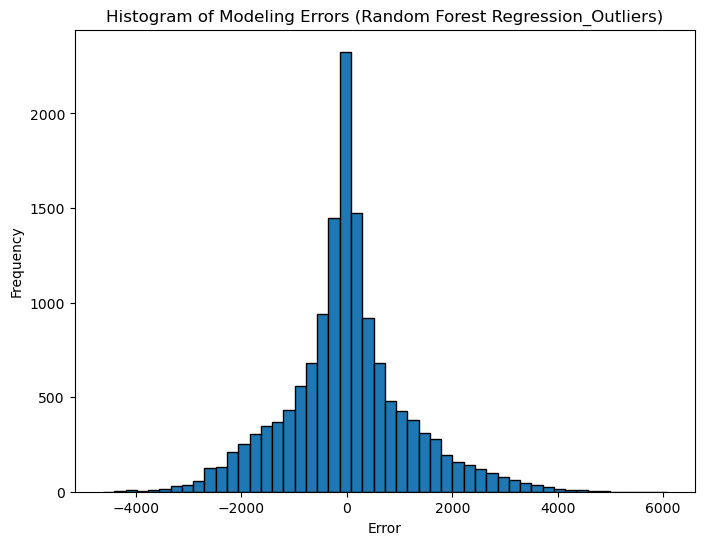

In [87]:
# Calculate modeling errors
errors = test_Y - test_Y_pred_RF

# Plot histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Histogram of Modeling Errors (Random Forest Regression_Outliers)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# xgb Regressor_outlier diamonds

In [88]:
Outlier_xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

Outlier_xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', Outlier_xgb_model)])

In [89]:
# Fit the model to the training data
Outlier_xgb_pipeline.fit(Train_X, Train_Y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'length_mm', 'width_mm',
                                                   'height_mm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              ea...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [90]:
# Make predictions on the training set
Train_Y_pred_xgb = Outlier_xgb_pipeline.predict(Train_X)

In [91]:
# Make predictions on the validation set
test_Y_pred_xgb = Outlier_xgb_pipeline.predict(test_X)

In [92]:
# Evaluate the model #regression tree performance
regressionSummary(Train_Y, Outlier_xgb_pipeline.predict(Train_X))
regressionSummary(test_Y, Outlier_xgb_pipeline.predict(test_X))


Regression statistics

                      Mean Error (ME) : -0.0155
       Root Mean Squared Error (RMSE) : 1316.4718
            Mean Absolute Error (MAE) : 924.2994
          Mean Percentage Error (MPE) : -1.7949
Mean Absolute Percentage Error (MAPE) : 9.2038

Regression statistics

                      Mean Error (ME) : -0.5122
       Root Mean Squared Error (RMSE) : 1376.0674
            Mean Absolute Error (MAE) : 971.7808
          Mean Percentage Error (MPE) : -1.7512
Mean Absolute Percentage Error (MAPE) : 9.5162


In [93]:
#Calculate mean squared error, training
mse = mean_squared_error(Train_Y, Train_Y_pred_xgb)
r2 = r2_score(Train_Y, Train_Y_pred_xgb)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1733097.8872697614
R-squared: 0.9624604060248559


In [94]:
#Calculate mean squared error, validation
mse = mean_squared_error(test_Y, test_Y_pred_xgb)
r2 = r2_score(test_Y, test_Y_pred_xgb)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1893561.520720329
R-squared: 0.9585148821880543


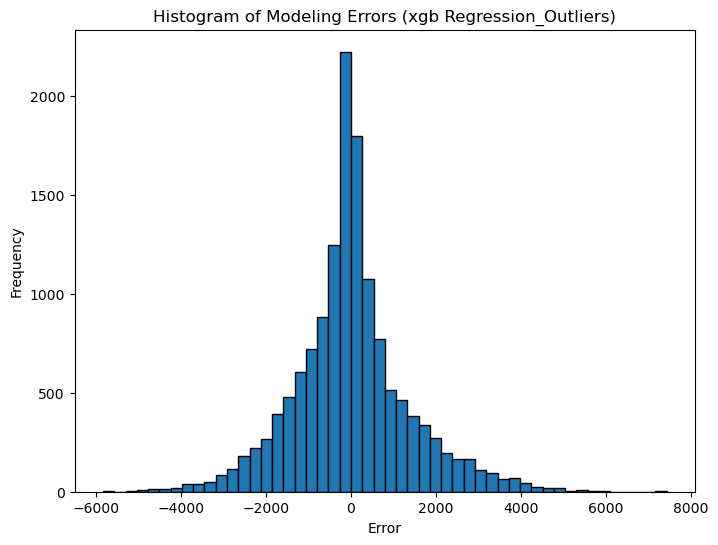

In [95]:
# Calculate modeling errors
errors = test_Y - test_Y_pred_xgb

# Plot histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Histogram of Modeling Errors (xgb Regression_Outliers)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# LightGBMRegressor_outlier data

In [96]:
#!pip install lightgbm
from lightgbm import LGBMRegressor

# new model
Outlier_lgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# new pipeline
Outlier_lgbm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', Outlier_lgbm_model)])

In [97]:
# Fit the model to the training data
Outlier_lgbm_pipeline.fit(Train_X, Train_Y)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1274
[LightGBM] [Info] Number of data points in the train set: 33224, number of used features: 26
[LightGBM] [Info] Start training from score 11311.070521


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'length_mm', 'width_mm',
                                                   'height_mm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('model', LGBMRegressor(random_state=42))])

In [98]:
# Make predictions on the training set
Train_Y_pred_lgbm = Outlier_lgbm_pipeline.predict(Train_X)

In [99]:
# Make predictions on the validation set
test_Y_pred_lgbm = Outlier_lgbm_pipeline.predict(test_X)

In [100]:
# Evaluate the model #regression tree performance
regressionSummary(Train_Y, Outlier_lgbm_pipeline.predict(Train_X))
regressionSummary(test_Y, Outlier_lgbm_pipeline.predict(test_X))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1319.8519
            Mean Absolute Error (MAE) : 940.9787
          Mean Percentage Error (MPE) : -2.2105
Mean Absolute Percentage Error (MAPE) : 10.0181

Regression statistics

                      Mean Error (ME) : 2.3285
       Root Mean Squared Error (RMSE) : 1376.8515
            Mean Absolute Error (MAE) : 986.1479
          Mean Percentage Error (MPE) : -2.0677
Mean Absolute Percentage Error (MAPE) : 10.2285


In [101]:
#Calculate mean squared error, training
mse = mean_squared_error(Train_Y, Train_Y_pred_lgbm)
r2 = r2_score(Train_Y, Train_Y_pred_lgbm)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1742008.9073496314
R-squared: 0.9622673897629588


In [102]:
#Calculate mean squared error, validation
mse = mean_squared_error(test_Y, test_Y_pred_lgbm)
r2 = r2_score(test_Y, test_Y_pred_lgbm)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1895720.0313081774
R-squared: 0.9584675924300743


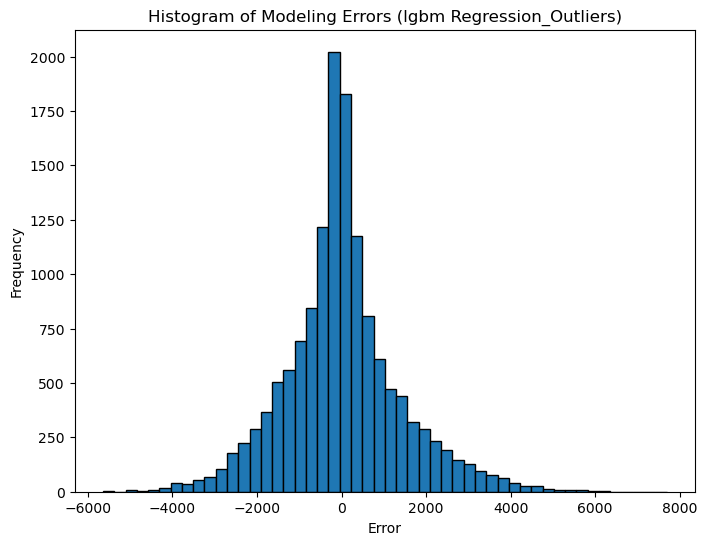

In [103]:
# Calculate modeling errors
errors = test_Y - test_Y_pred_lgbm

# Plot histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Histogram of Modeling Errors (lgbm Regression_Outliers)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# knn Regressor_outlier diamonds

In [104]:
#Initialise the model
Outlier_knn_model = KNeighborsRegressor(n_neighbors=5)  # You can tune this parameter

Outlier_knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),  # Assuming preprocessor is defined
                               ('scaler', StandardScaler()),    # Standardize features
                               ('model', Outlier_knn_model)])

In [105]:
# Fit the model to the training data
Outlier_knn_pipeline.fit(Train_X, Train_Y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'length_mm', 'width_mm',
                                                   'height_mm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('scaler', StandardScaler()),
                ('model', KNeighborsRegressor())])

In [106]:
# Make predictions on the training set
Train_Y_pred_knn = Outlier_knn_pipeline.predict(Train_X)

In [107]:
# Make predictions on the validation set
test_Y_pred_knn = Outlier_knn_pipeline.predict(test_X)

In [108]:
# Evaluate the model #regression tree performance
regressionSummary(Train_Y, Outlier_knn_pipeline.predict(Train_X))
regressionSummary(test_Y, Outlier_knn_pipeline.predict(test_X))


Regression statistics

                      Mean Error (ME) : -10.4554
       Root Mean Squared Error (RMSE) : 1067.9862
            Mean Absolute Error (MAE) : 742.4766
          Mean Percentage Error (MPE) : -0.6719
Mean Absolute Percentage Error (MAPE) : 6.6799

Regression statistics

                      Mean Error (ME) : -18.6500
       Root Mean Squared Error (RMSE) : 1224.1054
            Mean Absolute Error (MAE) : 861.3284
          Mean Percentage Error (MPE) : -0.8889
Mean Absolute Percentage Error (MAPE) : 7.6987


In [109]:
#Calculate mean squared error, training
mse = mean_squared_error(Train_Y, Train_Y_pred_knn)
r2 = r2_score(Train_Y, Train_Y_pred_knn)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1140594.440380448
R-squared: 0.9752942678560175


In [110]:
#Calculate mean squared error, validation
mse = mean_squared_error(test_Y, test_Y_pred_knn)
r2 = r2_score(test_Y, test_Y_pred_knn)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1498434.066474719
R-squared: 0.9671715372852057


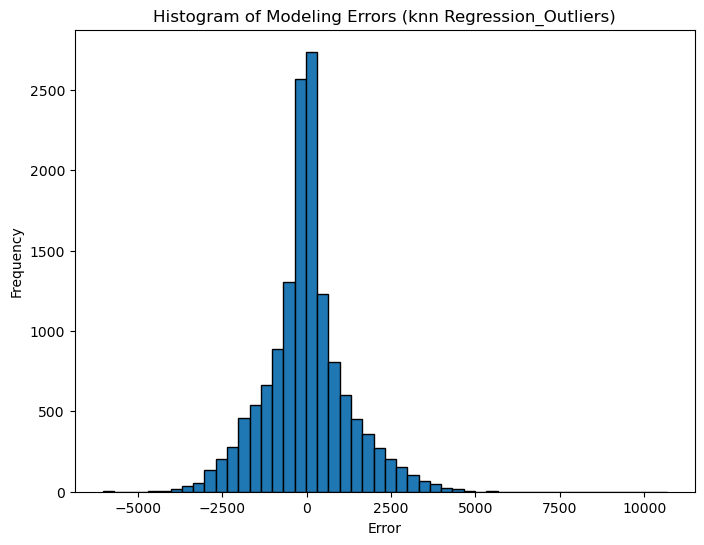

In [111]:
# Calculate modeling errors
errors = test_Y - test_Y_pred_knn

# Plot histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Histogram of Modeling Errors (knn Regression_Outliers)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# Linear Regression_outlier diamonds

In [112]:
#Initialise the model
Outlier_linear_model = LinearRegression()

Outlier_linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor),  # Assuming preprocessor is defined
                                  ('scaler', StandardScaler()),    # Standardize features
                                  ('model', Outlier_linear_model)])


In [113]:
# Fit the model to the training data
Outlier_linear_pipeline.fit(Train_X, Train_Y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'length_mm', 'width_mm',
                                                   'height_mm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [114]:
# Make predictions on the training set
Train_Y_pred_linreg = Outlier_linear_pipeline.predict(Train_X)

In [115]:
# Make predictions on the validation set
test_Y_pred_linreg = Outlier_linear_pipeline.predict(test_X)

In [116]:
# Evaluate the model #regression tree performance
regressionSummary(Train_Y, Outlier_linear_pipeline.predict(Train_X))
regressionSummary(test_Y, Outlier_linear_pipeline.predict(test_X))


Regression statistics

                      Mean Error (ME) : -4.0050
       Root Mean Squared Error (RMSE) : 2257.2593
            Mean Absolute Error (MAE) : 1719.9993
          Mean Percentage Error (MPE) : 1.6550
Mean Absolute Percentage Error (MAPE) : 35.2266

Regression statistics

                      Mean Error (ME) : 3.2832
       Root Mean Squared Error (RMSE) : 2229.6992
            Mean Absolute Error (MAE) : 1699.7783
          Mean Percentage Error (MPE) : 1.1276
Mean Absolute Percentage Error (MAPE) : 33.5322


In [117]:
#Calculate mean squared error, training
mse = mean_squared_error(Train_Y, Train_Y_pred_linreg)
r2 = r2_score(Train_Y, Train_Y_pred_linreg)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 5095219.62079404
R-squared: 0.8896355034624632


In [118]:
#Calculate mean squared error, validation
mse = mean_squared_error(test_Y, test_Y_pred_linreg)
r2 = r2_score(test_Y, test_Y_pred_linreg)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 4971558.372626935
R-squared: 0.8910805471380008


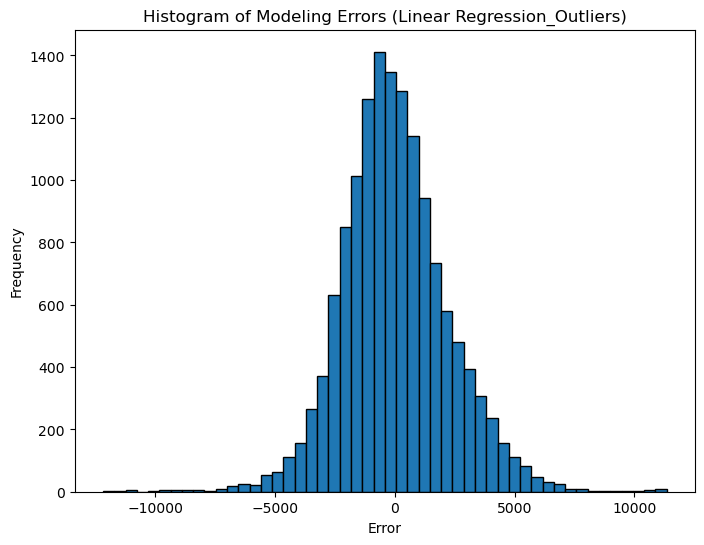

In [119]:
# Calculate modeling errors
errors = test_Y - test_Y_pred_linreg

# Plot histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Histogram of Modeling Errors (Linear Regression_Outliers)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# Decision Tree Regressor_outlier diamonds

In [123]:
#Initialise model
Outlier_decision_tree_model = DecisionTreeRegressor()  

Outlier_decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming preprocessor is defined
    ('scaler', StandardScaler()),    # Standardize features if necessary
    ('model', Outlier_decision_tree_model)
])

In [125]:
# Fit the model to the training data
Outlier_decision_tree_pipeline.fit(Train_X, Train_Y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'length_mm', 'width_mm',
                                                   'height_mm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('scaler', StandardScaler()),
                ('model', DecisionTreeRegressor())])

In [126]:
# Make predictions on the training set
Train_Y_pred_DT = Outlier_decision_tree_pipeline.predict(Train_X)

In [127]:
# Make predictions on the validation set
test_Y_pred_DT = Outlier_decision_tree_pipeline.predict(test_X)

In [128]:
# Evaluate the model #regression tree performance
regressionSummary(Train_Y, Outlier_decision_tree_pipeline.predict(Train_X))
regressionSummary(test_Y, Outlier_decision_tree_pipeline.predict(test_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1010.8430
            Mean Absolute Error (MAE) : 706.9034
          Mean Percentage Error (MPE) : -0.5978
Mean Absolute Percentage Error (MAPE) : 6.3723

Regression statistics

                      Mean Error (ME) : -3.7475
       Root Mean Squared Error (RMSE) : 1173.3785
            Mean Absolute Error (MAE) : 831.1997
          Mean Percentage Error (MPE) : -0.7152
Mean Absolute Percentage Error (MAPE) : 7.3743


In [129]:
#Calculate mean squared error, training
mse = mean_squared_error(Train_Y, Train_Y_pred_DT)
r2 = r2_score(Train_Y, Train_Y_pred_DT)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1021803.5363222753
R-squared: 0.9778673263883946


In [130]:
#Calculate mean squared error, validation
mse = mean_squared_error(test_Y, test_Y_pred_DT)
r2 = r2_score(test_Y, test_Y_pred_DT)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1376817.0385270775
R-squared: 0.9698359855627706


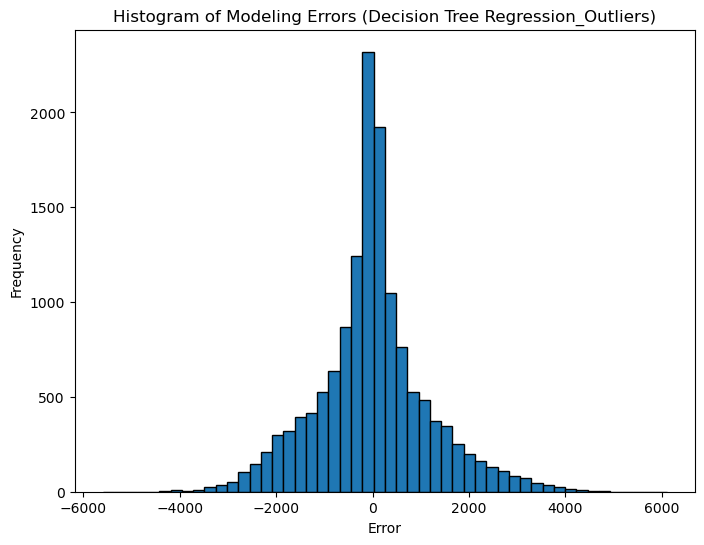

In [131]:
# Calculate modeling errors
errors = test_Y - test_Y_pred_DT

# Plot histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Histogram of Modeling Errors (Decision Tree Regression_Outliers)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# Prediction using outlier trained models

In [157]:
new_data = "D:/WINTER 2024/HACK DIVERISTY/FELLOW_2024/diamonds_for_sale_2024.csv" 

Out_df2024 = pd.read_csv(new_data)
Out_df2024

,index,carat,cut,color,clarity,depth,table,length (mm),width (mm),height (mm),year
0,0,0.23,Ideal,E,SI2,61.50,55.00,3.95,3.98,2.43,2024
1,1,0.23,Good,E,VS1,56.90,65.00,4.05,4.07,2.31,2024
2,2,0.29,Premium,I,VS2,62.40,58.00,4.20,4.23,2.63,2024
3,3,0.31,Good,J,SI2,63.30,58.00,4.34,4.35,2.75,2024
4,4,0.24,Very Good,J,VVS2,62.80,57.00,3.94,3.96,2.48,2024
...,...,...,...,...,...,...,...,...,...,...,...
33935,33935,0.72,Ideal,D,SI1,60.80,57.00,5.75,5.76,3.50,2024
33936,33936,0.72,Good,D,SI1,63.10,55.00,5.69,5.75,3.61,2024
33937,33937,0.70,Very Good,D,SI1,62.80,60.00,5.66,5.68,3.56,2024
33938,33938,0.86,Premium,H,SI2,61.00,58.00,6.15,6.12,3.74,2024


In [158]:
Out_df2024 = Out_df2024.rename(columns={'length (mm)': 'length_mm',
                      'width (mm)': 'width_mm',
                      'height (mm)': 'height_mm'})
Out_df2024

,index,carat,cut,color,clarity,depth,table,length_mm,width_mm,height_mm,year
0,0,0.23,Ideal,E,SI2,61.50,55.00,3.95,3.98,2.43,2024
1,1,0.23,Good,E,VS1,56.90,65.00,4.05,4.07,2.31,2024
2,2,0.29,Premium,I,VS2,62.40,58.00,4.20,4.23,2.63,2024
3,3,0.31,Good,J,SI2,63.30,58.00,4.34,4.35,2.75,2024
4,4,0.24,Very Good,J,VVS2,62.80,57.00,3.94,3.96,2.48,2024
...,...,...,...,...,...,...,...,...,...,...,...
33935,33935,0.72,Ideal,D,SI1,60.80,57.00,5.75,5.76,3.50,2024
33936,33936,0.72,Good,D,SI1,63.10,55.00,5.69,5.75,3.61,2024
33937,33937,0.70,Very Good,D,SI1,62.80,60.00,5.66,5.68,3.56,2024
33938,33938,0.86,Premium,H,SI2,61.00,58.00,6.15,6.12,3.74,2024


# Outlier Diamonds Prediction on the new dataset

In [159]:
# Use the trained Random Forest pipeline to predict prices on the new dataset
Outlier_RFpredicted_prices = Outlier_RFpipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
Out_df2024['Out_pred_cost_RF'] = Outlier_RFpredicted_prices

In [160]:
# Use the trained xgb pipeline to predict prices on the new dataset
Outlier_XGBpredicted_prices = Outlier_xgb_pipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
Out_df2024['Out_pred_cost_XGB'] = Outlier_XGBpredicted_prices

In [161]:
# Use the trained xgb pipeline to predict prices on the new dataset
Outlier_lgbmpredicted_prices =Outlier_lgbm_pipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
Out_df2024['Out_pred_cost_LGBM'] = Outlier_lgbmpredicted_prices

In [162]:
# Use the trained knn pipeline to predict prices on the new dataset
Outlier_knnpredicted_prices = Outlier_knn_pipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
Out_df2024['Out_pred_cost_KNN'] = Outlier_knnpredicted_prices

In [165]:
# Use the trained pipeline to predict prices on the new dataset
Outlier_linearpredicted_prices = Outlier_linear_pipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
Out_df2024['Out_pred_cost_Lin'] = Outlier_linearpredicted_prices

In [166]:
# Use the trained pipeline to predict prices on the new dataset
Outlier_DecisionTreepredicted_prices = Outlier_decision_tree_pipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
Out_df2024['Out_pred_cost_DT'] = Outlier_DecisionTreepredicted_prices

In [167]:
# Average predicted cost
Out_df2024['Out_pred_cost_avg'] = Out_df2024[['Out_pred_cost_RF', 'Out_pred_cost_XGB', 'Out_pred_cost_LGBM', 'Out_pred_cost_KNN', 'Out_pred_cost_DT']].mean(axis=1)
# Cost range (max - min)
Out_df2024['Out_pred_cost_range_min'] = Out_df2024[['Out_pred_cost_RF', 'Out_pred_cost_XGB', 'Out_pred_cost_LGBM', 'Out_pred_cost_KNN', 'Out_pred_cost_DT']].min(axis=1)
Out_df2024['Out_pred_cost_range_max'] = Out_df2024[['Out_pred_cost_RF', 'Out_pred_cost_XGB', 'Out_pred_cost_LGBM', 'Out_pred_cost_KNN', 'Out_pred_cost_DT']].max(axis=1)

Out_df2024

,index,carat,cut,color,clarity,depth,table,length_mm,width_mm,height_mm,year,Out_pred_cost_RF,Out_pred_cost_XGB,Out_pred_cost_LGBM,Out_pred_cost_KNN,Out_pred_cost_Lin,Out_pred_cost_DT,Out_pred_cost_avg,Out_pred_cost_range_min,Out_pred_cost_range_max
0,0,0.23,Ideal,E,SI2,61.50,55.00,3.95,3.98,2.43,2024,1890.93,1476.37,1728.13,2665.80,3356.87,1853.00,1922.85,1476.37,2665.80
1,1,0.23,Good,E,VS1,56.90,65.00,4.05,4.07,2.31,2024,1894.83,2133.63,1570.63,349.00,2095.87,1566.60,1502.94,349.00,2133.63
2,2,0.29,Premium,I,VS2,62.40,58.00,4.20,4.23,2.63,2024,2333.80,2184.75,2029.85,1315.60,4606.37,2162.25,2005.25,1315.60,2333.80
3,3,0.31,Good,J,SI2,63.30,58.00,4.34,4.35,2.75,2024,2172.17,1818.24,1959.66,1962.40,-617.13,2400.38,2062.57,1818.24,2400.38
4,4,0.24,Very Good,J,VVS2,62.80,57.00,3.94,3.96,2.48,2024,1846.38,1864.82,1820.20,1363.60,3142.50,1384.82,1655.97,1363.60,1864.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33935,33935,0.72,Ideal,D,SI1,60.80,57.00,5.75,5.76,3.50,2024,14161.80,14402.20,14307.71,14954.60,14083.62,14663.29,14497.92,14161.80,14954.60
33936,33936,0.72,Good,D,SI1,63.10,55.00,5.69,5.75,3.61,2024,14357.95,14477.86,14482.12,13065.20,12832.87,14260.50,14128.73,13065.20,14482.12
33937,33937,0.70,Very Good,D,SI1,62.80,60.00,5.66,5.68,3.56,2024,14093.16,13735.65,14133.88,14212.20,13808.87,13719.00,13978.78,13719.00,14212.20
33938,33938,0.86,Premium,H,SI2,61.00,58.00,6.15,6.12,3.74,2024,14231.15,14010.45,13537.49,14214.80,12127.87,14536.50,14106.08,13537.49,14536.50


In [168]:
#What will be the total sales in 2024?
pd.set_option('display.float_format', lambda x: '%.2f' % x)
Out_total_sales_RF = Out_df2024['Out_pred_cost_RF'].sum()
Out_total_sales_XGB = Out_df2024['Out_pred_cost_XGB'].sum()
Out_total_sales_LGBM = Out_df2024['Out_pred_cost_LGBM'].sum()
Out_total_sales_KNN = Out_df2024['Out_pred_cost_KNN'].sum()
Out_total_sales_LinReg = Out_df2024['Out_pred_cost_Lin'].sum()
Out_total_sales_DT = Out_df2024['Out_pred_cost_DT'].sum()


print(f'Out_Total sales_RF: {Out_total_sales_RF}')
print(f'Out_Total sales_XGB: {Out_total_sales_XGB}')
print(f'Out_Total sales_LGBM: {Out_total_sales_LGBM}')
print(f'Out_Total sales_KNN: {Out_total_sales_KNN}')
print(f'Out_Total sales_LinReg: {Out_total_sales_LinReg}')
print(f'Out_Total sales_DT: {Out_total_sales_DT}')

Out_Total sales_RF: 390947200.0123075
Out_Total sales_XGB: 393830048.0
Out_Total sales_LGBM: 388653820.7075808
Out_Total sales_KNN: 465417758.4
Out_Total sales_LinReg: 487811444.8183694
Out_Total sales_DT: 389640043.49554276


In [170]:
#What is the average predicted diamond sale in 2024?
Out_average_price_RF = Out_df2024['Out_pred_cost_RF'].mean()
Out_average_price_XGB = Out_df2024['Out_pred_cost_XGB'].mean()
Out_average_price_LGBM = Out_df2024['Out_pred_cost_LGBM'].mean()
Out_average_price_KNN = Out_df2024['Out_pred_cost_KNN'].mean()
Out_average_price_LinReg = Out_df2024['Out_pred_cost_Lin'].mean()
Out_average_price_DT = Out_df2024['Out_pred_cost_DT'].mean()

print(f"Out_RF_Average predicted diamond sale price in 2024: {Out_average_price_RF}")
print(f"Out_XGB_Average predicted diamond sale price in 2024: {Out_average_price_XGB}")
print(f"Out_LGBM_Average predicted diamond sale price in 2024: {Out_average_price_LGBM}")
print(f"Out_KNN_Average predicted diamond sale price in 2024: {Out_average_price_KNN}")
print(f"Out_LinReg_Average predicted diamond sale price in 2024: {Out_average_price_LinReg}")
print(f"Out_DT_Average predicted diamond sale price in 2024: {Out_average_price_DT}")

Out_RF_Average predicted diamond sale price in 2024: 11518.774307964275
Out_XGB_Average predicted diamond sale price in 2024: 11603.7138671875
Out_LGBM_Average predicted diamond sale price in 2024: 11451.202731513871
Out_KNN_Average predicted diamond sale price in 2024: 13712.956935769003
Out_LinReg_Average predicted diamond sale price in 2024: 14372.759128413947
Out_DT_Average predicted diamond sale price in 2024: 11480.260562626481


In [172]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) #Set display options to suppress scientific notation
Out_total_sales_per_cut = Out_df2024.groupby('cut')[['Out_pred_cost_RF', 'Out_pred_cost_XGB', 'Out_pred_cost_LGBM', 'Out_pred_cost_KNN', 'Out_pred_cost_Lin', 'Out_pred_cost_DT']].sum()
print(Out_total_sales_per_cut)

           Out_pred_cost_RF  Out_pred_cost_XGB  Out_pred_cost_LGBM  \
cut                                                                  
Fair            12402131.25        12412139.00         12346799.76   
Good            36537731.92        37472608.00         36852956.34   
Ideal          148141666.67       148127024.00        146316522.85   
Premium        104262180.96       105277800.00        104012108.18   
Very Good       89603489.21        90540488.00         89125433.58   

           Out_pred_cost_KNN  Out_pred_cost_Lin  Out_pred_cost_DT  
cut                                                                
Fair              9948613.00        14749815.62       12505231.27  
Good             34863842.40        41087048.39       36878553.36  
Ideal           206807836.40       191284551.07      147191947.66  
Premium         112493276.00       130419037.18      104267080.91  
Very Good       101304190.60       110270992.56       88797230.29  


In [186]:
df2024

,index,carat,cut,color,clarity,depth,table,length_mm,width_mm,height_mm,...,pred_cost_range_min,pred_cost_range_max,Out_pred_cost_RF,Out_pred_cost_XGB,RF_combined_prediction,knn_combined_prediction,xgb_combined_prediction,lgbm_combined_prediction,Linreg_combined_prediction,DT_combined_prediction
0,0,0.23,Ideal,E,SI2,61.50,55.00,3.95,3.98,2.43,...,363.16,538.27,1890.93,1476.37,1127.04,1515.80,943.71,1133.20,1212.12,1108.25
1,1,0.23,Good,E,VS1,56.90,65.00,4.05,4.07,2.31,...,421.38,691.00,1894.83,2133.63,1160.07,520.00,1316.29,1039.10,1207.20,993.99
2,2,0.29,Premium,I,VS2,62.40,58.00,4.20,4.23,2.63,...,383.96,495.71,2333.80,2184.75,1358.88,852.70,1309.97,1262.78,2069.79,1274.05
3,3,0.31,Good,J,SI2,63.30,58.00,4.34,4.35,2.75,...,365.20,440.04,2172.17,1818.24,1275.68,1163.80,1105.59,1199.85,-1651.47,1389.74
4,4,0.24,Very Good,J,VVS2,62.80,57.00,3.94,3.96,2.48,...,367.46,450.89,1846.38,1864.82,1114.84,876.90,1116.14,1135.55,1137.68,884.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33935,33935,0.72,Ideal,D,SI1,60.80,57.00,5.75,5.76,3.50,...,3054.20,3300.88,14161.80,14402.20,8626.25,9004.40,8851.54,8775.43,8857.98,8880.48
33936,33936,0.72,Good,D,SI1,63.10,55.00,5.69,5.75,3.61,...,3118.56,3234.47,14357.95,14477.86,8738.25,8133.60,8810.32,8858.30,8139.19,8691.04
33937,33937,0.70,Very Good,D,SI1,62.80,60.00,5.66,5.68,3.56,...,2943.62,3187.40,14093.16,13735.65,8617.59,8699.80,8339.63,8585.26,8499.30,8435.78
33938,33938,0.86,Premium,H,SI2,61.00,58.00,6.15,6.12,3.74,...,2909.71,3117.20,14231.15,14010.45,8643.26,8666.00,8460.08,8291.00,7607.20,8796.42


# Training model on diamonda data without outliers

In [246]:
# create a list containing predictors' name
predictors = ['carat', 'cut', 'color', 'depth', 'table', 'length_mm', 'width_mm', 'height_mm', 'clarity']
print(predictors)

['carat', 'cut', 'color', 'depth', 'table', 'length_mm', 'width_mm', 'height_mm', 'clarity']


In [247]:
# define outcome/target variable
outcome = 'cost_dollars'
print(outcome)

cost_dollars


In [248]:
X = diamond_df_cleaned[predictors]
Y = diamond_df_cleaned[outcome]

In [249]:
train_X, Test_X, train_Y, Test_Y = train_test_split(X, Y, test_size=0.3, random_state=1)
train_X.head()

,carat,cut,color,depth,table,length_mm,width_mm,height_mm,clarity
95194,0.39,Ideal,E,61.50,55.50,4.68,4.72,2.88,IF
238002,1.03,Good,J,63.60,57.00,6.38,6.29,4.03,SI1
165592,0.62,Very Good,I,63.10,58.00,5.40,5.44,3.42,VVS1
179728,1.01,Good,F,63.90,58.00,6.39,6.32,4.06,VS2
65419,0.71,Premium,G,62.10,58.00,5.72,5.68,3.54,SI2


In [250]:
# pre-processing for numerical and categorical data
numerical_cols = ['carat', 'depth', 'table', 'length_mm', 'width_mm', 'height_mm']
categorical_cols = ['cut', 'color', 'clarity']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Random Forest Regression without Outliers

In [251]:
# Initialize the Random Forest Regressor
No_Outlier_RFmodel = RandomForestRegressor(n_estimators=100, random_state=42)

No_Outlier_RFpipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', No_Outlier_RFmodel)])

In [252]:
# Fit the model to the training data
No_Outlier_RFpipeline.fit(train_X, train_Y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'length_mm', 'width_mm',
                                                   'height_mm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [253]:
# Make predictions on the training set
train_Y_pred_RF = No_Outlier_RFpipeline.predict(train_X)

In [254]:
# Make predictions on the validation set
Test_Y_pred_RF = No_Outlier_RFpipeline.predict(Test_X)

In [255]:
# Evaluate the model #regression tree performance
regressionSummary(train_Y, No_Outlier_RFpipeline.predict(train_X))
regressionSummary(Test_Y, No_Outlier_RFpipeline.predict(Test_X))


Regression statistics

                      Mean Error (ME) : 0.3535
       Root Mean Squared Error (RMSE) : 357.1836
            Mean Absolute Error (MAE) : 226.6080
          Mean Percentage Error (MPE) : -0.6414
Mean Absolute Percentage Error (MAPE) : 6.7008

Regression statistics

                      Mean Error (ME) : 1.2652
       Root Mean Squared Error (RMSE) : 409.0016
            Mean Absolute Error (MAE) : 258.8452
          Mean Percentage Error (MPE) : -0.7318
Mean Absolute Percentage Error (MAPE) : 7.6090


In [256]:
#Calculate mean squared error, training
mse = mean_squared_error(train_Y, train_Y_pred_RF)
r2 = r2_score(train_Y, train_Y_pred_RF)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 127580.1415939147
R-squared: 0.986634417189222


In [257]:
#Calculate mean squared error, validation
mse = mean_squared_error(Test_Y, Test_Y_pred_RF)
r2 = r2_score(Test_Y, Test_Y_pred_RF)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 167282.28130277514
R-squared: 0.9824196618640749


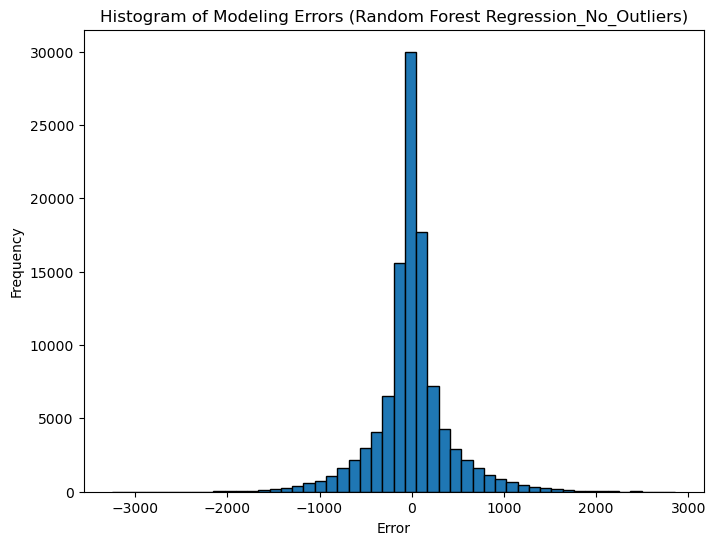

In [258]:
# Calculate modeling errors
errors = Test_Y - Test_Y_pred_RF

# Plot histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Histogram of Modeling Errors (Random Forest Regression_No_Outliers)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# xgb Regression model

In [259]:
No_Outlier_xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

No_Outlier_xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', No_Outlier_xgb_model)])

In [260]:
# Fit the model to the training data
No_Outlier_xgb_pipeline.fit(train_X, train_Y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'length_mm', 'width_mm',
                                                   'height_mm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              ea...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [261]:
# Make predictions on the training set
train_Y_pred_xgb = No_Outlier_xgb_pipeline.predict(train_X)

In [262]:
# Make predictions on the validation set
Test_Y_pred_xgb = No_Outlier_xgb_pipeline.predict(Test_X)

In [263]:
# Evaluate the model #regression tree performance
regressionSummary(train_Y, No_Outlier_xgb_pipeline.predict(train_X))
regressionSummary(Test_Y, No_Outlier_xgb_pipeline.predict(Test_X))


Regression statistics

                      Mean Error (ME) : -0.0013
       Root Mean Squared Error (RMSE) : 506.0241
            Mean Absolute Error (MAE) : 317.0495
          Mean Percentage Error (MPE) : -1.7890
Mean Absolute Percentage Error (MAPE) : 10.0038

Regression statistics

                      Mean Error (ME) : 0.4846
       Root Mean Squared Error (RMSE) : 514.0996
            Mean Absolute Error (MAE) : 320.3575
          Mean Percentage Error (MPE) : -1.8096
Mean Absolute Percentage Error (MAPE) : 10.0814


In [264]:
#Calculate mean squared error, training
mse = mean_squared_error(train_Y, train_Y_pred_xgb)
r2 = r2_score(train_Y, train_Y_pred_xgb)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 256060.43759988775
R-squared: 0.9731745321760279


In [265]:
#Calculate mean squared error, validation
mse = mean_squared_error(Test_Y, Test_Y_pred_xgb)
r2 = r2_score(Test_Y, Test_Y_pred_xgb)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 264298.3527611116
R-squared: 0.9722238698915252


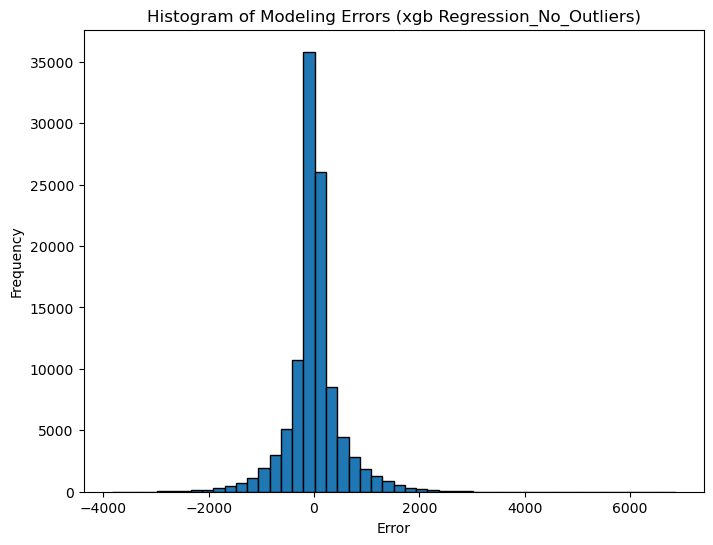

In [266]:
# Calculate modeling errors
errors = Test_Y - Test_Y_pred_xgb

# Plot histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Histogram of Modeling Errors (xgb Regression_No_Outliers)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# LightGBM Regressor model #no outlier cluster

In [267]:
# new model
No_Outlier_lgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# new pipeline
No_Outlier_lgbm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', No_Outlier_lgbm_model)])

In [268]:
# Fit the model to the training data
No_Outlier_lgbm_pipeline.fit(train_X, train_Y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 249009, number of used features: 26
[LightGBM] [Info] Start training from score 3472.400459


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'length_mm', 'width_mm',
                                                   'height_mm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('model', LGBMRegressor(random_state=42))])

In [269]:
# Make predictions on the training set
train_Y_pred_lgbm = No_Outlier_lgbm_pipeline.predict(train_X)

In [270]:
# Make predictions on the validation set
Test_Y_pred_lgbm = No_Outlier_lgbm_pipeline.predict(Test_X)

In [271]:
# Evaluate the model #regression tree performance
regressionSummary(train_Y, No_Outlier_lgbm_pipeline.predict(train_X))
regressionSummary(Test_Y, No_Outlier_lgbm_pipeline.predict(Test_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 503.4477
            Mean Absolute Error (MAE) : 317.8361
          Mean Percentage Error (MPE) : -1.9529
Mean Absolute Percentage Error (MAPE) : 10.2175

Regression statistics

                      Mean Error (ME) : 1.1403
       Root Mean Squared Error (RMSE) : 509.6615
            Mean Absolute Error (MAE) : 320.0765
          Mean Percentage Error (MPE) : -1.9517
Mean Absolute Percentage Error (MAPE) : 10.2617


In [272]:
#Calculate mean squared error, training
mse = mean_squared_error(train_Y, train_Y_pred_lgbm)
r2 = r2_score(train_Y, train_Y_pred_lgbm)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 253459.62269686296
R-squared: 0.973446999399591


In [273]:
#Calculate mean squared error, validation
mse = mean_squared_error(Test_Y, Test_Y_pred_lgbm)
r2 = r2_score(Test_Y, Test_Y_pred_lgbm)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 259754.87710051172
R-squared: 0.9727013612181835


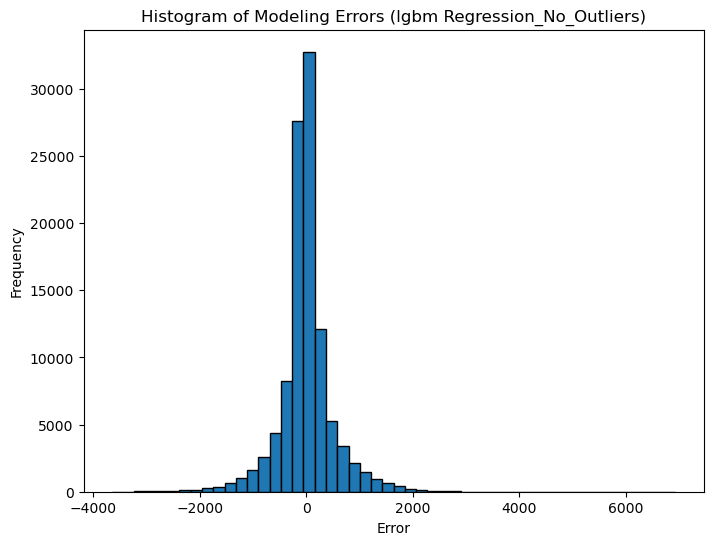

In [274]:
# Calculate modeling errors
errors = Test_Y - Test_Y_pred_lgbm

# Plot histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Histogram of Modeling Errors (lgbm Regression_No_Outliers)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# knn regression_no outlier cluster

In [275]:
#Initialise the model
No_Outlier_knn_model = KNeighborsRegressor(n_neighbors=5)  # You can tune this parameter

No_Outlier_knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),  # Assuming preprocessor is defined
                               ('scaler', StandardScaler()),    # Standardize features
                               ('model', No_Outlier_knn_model)])

In [276]:
# Fit the model to the training data
No_Outlier_knn_pipeline.fit(train_X, train_Y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'length_mm', 'width_mm',
                                                   'height_mm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('scaler', StandardScaler()),
                ('model', KNeighborsRegressor())])

In [277]:
# Make predictions on the training set
train_Y_pred_knn = No_Outlier_knn_pipeline.predict(train_X)

In [278]:
# Make predictions on the validation set
Test_Y_pred_knn = No_Outlier_knn_pipeline.predict(Test_X)

In [279]:
# Evaluate the model #regression performance
regressionSummary(train_Y, No_Outlier_knn_pipeline.predict(train_X))
regressionSummary(Test_Y, No_Outlier_knn_pipeline.predict(Test_X))


Regression statistics

                      Mean Error (ME) : 0.6031
       Root Mean Squared Error (RMSE) : 375.4074
            Mean Absolute Error (MAE) : 235.2227
          Mean Percentage Error (MPE) : -0.6430
Mean Absolute Percentage Error (MAPE) : 6.9354

Regression statistics

                      Mean Error (ME) : 2.6719
       Root Mean Squared Error (RMSE) : 423.8383
            Mean Absolute Error (MAE) : 266.0579
          Mean Percentage Error (MPE) : -0.7283
Mean Absolute Percentage Error (MAPE) : 7.8031


In [280]:
#Calculate mean squared error, training
mse = mean_squared_error(train_Y, train_Y_pred_knn)
r2 = r2_score(train_Y, train_Y_pred_knn)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 140930.73251376455
R-squared: 0.9852357792328538


In [281]:
#Calculate mean squared error, validation
mse = mean_squared_error(Test_Y, Test_Y_pred_knn)
r2 = r2_score(Test_Y, Test_Y_pred_knn)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 179638.91156288947
R-squared: 0.9811210560792804


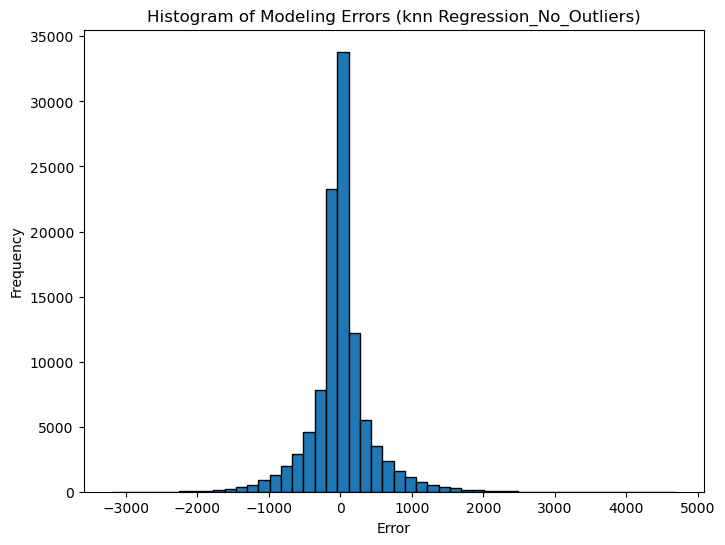

In [282]:
# Calculate modeling errors
errors = Test_Y - Test_Y_pred_knn

# Plot histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Histogram of Modeling Errors (knn Regression_No_Outliers)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# Linear Regression_No outlier data

In [283]:
#Initialise the model
No_Outlier_linear_model = LinearRegression()

No_Outlier_linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor),  # Assuming preprocessor is defined
                                  ('scaler', StandardScaler()),    # Standardize features
                                  ('model', No_Outlier_linear_model)])


In [284]:
# Fit the model to the training data
No_Outlier_linear_pipeline.fit(train_X, train_Y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'length_mm', 'width_mm',
                                                   'height_mm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [285]:
# Make predictions on the training set
train_Y_pred_Linreg = No_Outlier_linear_pipeline.predict(train_X)

In [286]:
# Make predictions on the validation set
Test_Y_pred_Linreg = No_Outlier_linear_pipeline.predict(Test_X)

In [287]:
# Evaluate the model #regression performance
regressionSummary(train_Y, No_Outlier_linear_pipeline.predict(train_X))
regressionSummary(Test_Y, No_Outlier_linear_pipeline.predict(Test_X))


Regression statistics

                      Mean Error (ME) : -2.7388
       Root Mean Squared Error (RMSE) : 892.8665
            Mean Absolute Error (MAE) : 619.1259
          Mean Percentage Error (MPE) : 3.6070
Mean Absolute Percentage Error (MAPE) : 31.9491

Regression statistics

                      Mean Error (ME) : -5.7823
       Root Mean Squared Error (RMSE) : 887.4504
            Mean Absolute Error (MAE) : 614.3891
          Mean Percentage Error (MPE) : 3.6412
Mean Absolute Percentage Error (MAPE) : 31.8702


In [288]:
#Calculate mean squared error, training
mse = mean_squared_error(train_Y, train_Y_pred_Linreg)
r2 = r2_score(train_Y, train_Y_pred_Linreg)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 797210.5365090773
R-squared: 0.916482429708754


In [289]:
#Calculate mean squared error, validation
mse = mean_squared_error(Test_Y, Test_Y_pred_Linreg)
r2 = r2_score(Test_Y, Test_Y_pred_Linreg)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 787568.1631543122
R-squared: 0.9172314335653877


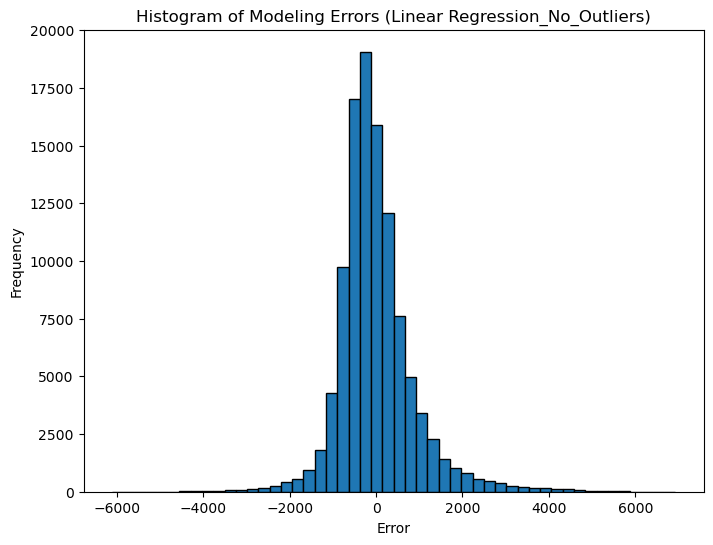

In [290]:
# Calculate modeling errors
errors = Test_Y - Test_Y_pred_Linreg

# Plot histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Histogram of Modeling Errors (Linear Regression_No_Outliers)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# Decision Tree regression_No outlier data

In [291]:
#Initialise model
No_Outlier_decision_tree_model = DecisionTreeRegressor()  

No_Outlier_decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming preprocessor is defined
    ('scaler', StandardScaler()),    # Standardize features if necessary
    ('model', No_Outlier_decision_tree_model)
])

In [292]:
# Fit the model to the training data
No_Outlier_decision_tree_pipeline.fit(train_X, train_Y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'length_mm', 'width_mm',
                                                   'height_mm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('scaler', StandardScaler()),
                ('model', DecisionTreeRegressor())])

In [293]:
# Make predictions on the training set
train_Y_pred_DT = No_Outlier_decision_tree_pipeline.predict(train_X)

In [294]:
# Make predictions on the validation set
Test_Y_pred_DT = No_Outlier_decision_tree_pipeline.predict(Test_X)

In [295]:
# Evaluate the model #regression tree performance
regressionSummary(train_Y, No_Outlier_decision_tree_pipeline.predict(train_X))
regressionSummary(Test_Y, No_Outlier_decision_tree_pipeline.predict(Test_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 356.8381
            Mean Absolute Error (MAE) : 226.3633
          Mean Percentage Error (MPE) : -0.6430
Mean Absolute Percentage Error (MAPE) : 6.6965

Regression statistics

                      Mean Error (ME) : 0.7562
       Root Mean Squared Error (RMSE) : 408.8877
            Mean Absolute Error (MAE) : 258.7435
          Mean Percentage Error (MPE) : -0.7323
Mean Absolute Percentage Error (MAPE) : 7.6061


In [296]:
#Calculate mean squared error, training
mse = mean_squared_error(train_Y, train_Y_pred_DT)
r2 = r2_score(train_Y, train_Y_pred_DT)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 127333.39500125444
R-squared: 0.9866602669176849


In [297]:
#Calculate mean squared error, validation
mse = mean_squared_error(Test_Y, Test_Y_pred_DT)
r2 = r2_score(Test_Y, Test_Y_pred_DT)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 167189.14555191854
R-squared: 0.9824294498582358


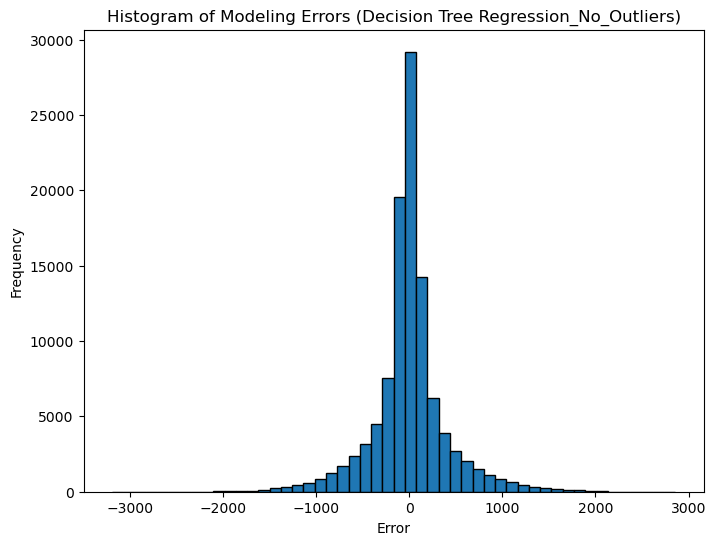

In [298]:
# Calculate modeling errors
errors = Test_Y - Test_Y_pred_DT

# Plot histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Histogram of Modeling Errors (Decision Tree Regression_No_Outliers)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# Prediction on 2024 dataset

In [304]:
new = "D:/WINTER 2024/HACK DIVERISTY/FELLOW_2024/diamonds_for_sale_2024.csv" 

No_Out_df2024 = pd.read_csv(new)
No_Out_df2024

,index,carat,cut,color,clarity,depth,table,length (mm),width (mm),height (mm),year
0,0,0.23,Ideal,E,SI2,61.50,55.00,3.95,3.98,2.43,2024
1,1,0.23,Good,E,VS1,56.90,65.00,4.05,4.07,2.31,2024
2,2,0.29,Premium,I,VS2,62.40,58.00,4.20,4.23,2.63,2024
3,3,0.31,Good,J,SI2,63.30,58.00,4.34,4.35,2.75,2024
4,4,0.24,Very Good,J,VVS2,62.80,57.00,3.94,3.96,2.48,2024
...,...,...,...,...,...,...,...,...,...,...,...
33935,33935,0.72,Ideal,D,SI1,60.80,57.00,5.75,5.76,3.50,2024
33936,33936,0.72,Good,D,SI1,63.10,55.00,5.69,5.75,3.61,2024
33937,33937,0.70,Very Good,D,SI1,62.80,60.00,5.66,5.68,3.56,2024
33938,33938,0.86,Premium,H,SI2,61.00,58.00,6.15,6.12,3.74,2024


In [305]:
No_Out_df2024 = df2024.rename(columns={'length (mm)': 'length_mm',
                      'width (mm)': 'width_mm',
                      'height (mm)': 'height_mm'})
No_Out_df2024

,index,carat,cut,color,clarity,depth,table,length_mm,width_mm,height_mm,...,pred_cost_range_min,pred_cost_range_max,Out_pred_cost_RF,Out_pred_cost_XGB,RF_combined_prediction,knn_combined_prediction,xgb_combined_prediction,lgbm_combined_prediction,Linreg_combined_prediction,DT_combined_prediction
0,0,0.23,Ideal,E,SI2,61.50,55.00,3.95,3.98,2.43,...,363.16,538.27,1890.93,1476.37,1127.04,1515.80,943.71,1133.20,1212.12,1108.25
1,1,0.23,Good,E,VS1,56.90,65.00,4.05,4.07,2.31,...,421.38,691.00,1894.83,2133.63,1160.07,520.00,1316.29,1039.10,1207.20,993.99
2,2,0.29,Premium,I,VS2,62.40,58.00,4.20,4.23,2.63,...,383.96,495.71,2333.80,2184.75,1358.88,852.70,1309.97,1262.78,2069.79,1274.05
3,3,0.31,Good,J,SI2,63.30,58.00,4.34,4.35,2.75,...,365.20,440.04,2172.17,1818.24,1275.68,1163.80,1105.59,1199.85,-1651.47,1389.74
4,4,0.24,Very Good,J,VVS2,62.80,57.00,3.94,3.96,2.48,...,367.46,450.89,1846.38,1864.82,1114.84,876.90,1116.14,1135.55,1137.68,884.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33935,33935,0.72,Ideal,D,SI1,60.80,57.00,5.75,5.76,3.50,...,3054.20,3300.88,14161.80,14402.20,8626.25,9004.40,8851.54,8775.43,8857.98,8880.48
33936,33936,0.72,Good,D,SI1,63.10,55.00,5.69,5.75,3.61,...,3118.56,3234.47,14357.95,14477.86,8738.25,8133.60,8810.32,8858.30,8139.19,8691.04
33937,33937,0.70,Very Good,D,SI1,62.80,60.00,5.66,5.68,3.56,...,2943.62,3187.40,14093.16,13735.65,8617.59,8699.80,8339.63,8585.26,8499.30,8435.78
33938,33938,0.86,Premium,H,SI2,61.00,58.00,6.15,6.12,3.74,...,2909.71,3117.20,14231.15,14010.45,8643.26,8666.00,8460.08,8291.00,7607.20,8796.42


In [306]:
# Use the trained Random Forest pipeline to predict prices on the new dataset
No_Outlier_RFpredicted_prices = No_Outlier_RFpipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
No_Out_df2024['No_Out_pred_cost_RF'] = No_Outlier_RFpredicted_prices

In [307]:
# Use the trained xgb pipeline to predict prices on the new dataset
No_Outlier_XGBpredicted_prices = No_Outlier_xgb_pipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
No_Out_df2024['No_Out_pred_cost_XGB'] = No_Outlier_XGBpredicted_prices

In [308]:
# Use the trained lgbm pipeline to predict prices on the new dataset
No_Outlier_lgbmpredicted_prices = No_Outlier_lgbm_pipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
No_Out_df2024['No_Out_pred_cost_LGBM'] = No_Outlier_lgbmpredicted_prices

In [309]:
# Use the trained knn pipeline to predict prices on the new dataset
No_Outlier_knnpredicted_prices = No_Outlier_knn_pipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
No_Out_df2024['No_Out_pred_cost_KNN'] = No_Outlier_knnpredicted_prices

In [310]:
# Use the trained pipeline to predict prices on the new dataset
No_Outlier_linearpredicted_prices = No_Outlier_linear_pipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
No_Out_df2024['No_Out_pred_cost_Lin'] = No_Outlier_linearpredicted_prices

In [311]:
# Use the trained pipeline to predict prices on the new dataset
No_Outlier_DecisionTreepredicted_prices = No_Outlier_decision_tree_pipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
No_Out_df2024['No_Out_pred_cost_DT'] = No_Outlier_DecisionTreepredicted_prices

In [312]:
# Average predicted cost
No_Out_df2024['No_Out_pred_cost_avg'] = No_Out_df2024[['No_Out_pred_cost_RF', 'No_Out_pred_cost_XGB', 'No_Out_pred_cost_LGBM', 'No_Out_pred_cost_KNN', 'No_Out_pred_cost_DT']].mean(axis=1)
# Cost range (max - min)
No_Out_df2024['No_Out_pred_cost_range_min'] = No_Out_df2024[['No_Out_pred_cost_RF', 'No_Out_pred_cost_XGB', 'No_Out_pred_cost_LGBM', 'No_Out_pred_cost_KNN', 'No_Out_pred_cost_DT']].min(axis=1)
No_Out_df2024['No_Out_pred_cost_range_max'] = No_Out_df2024[['No_Out_pred_cost_RF', 'No_Out_pred_cost_XGB', 'No_Out_pred_cost_LGBM', 'No_Out_pred_cost_KNN', 'No_Out_pred_cost_DT']].max(axis=1)

No_Out_df2024

,index,carat,cut,color,clarity,depth,table,length_mm,width_mm,height_mm,...,DT_combined_prediction,No_Out_pred_cost_RF,No_Out_pred_cost_XGB,No_Out_pred_cost_LGBM,No_Out_pred_cost_KNN,No_Out_pred_cost_Lin,No_Out_pred_cost_DT,No_Out_pred_cost_avg,No_Out_pred_cost_range_min,No_Out_pred_cost_range_max
0,0,0.23,Ideal,E,SI2,61.50,55.00,3.95,3.98,2.43,...,1108.25,363.16,411.05,538.27,365.80,-927.70,363.50,408.36,363.16,538.27
1,1,0.23,Good,E,VS1,56.90,65.00,4.05,4.07,2.31,...,993.99,425.31,498.96,507.56,691.00,319.37,413.67,507.30,413.67,691.00
2,2,0.29,Premium,I,VS2,62.40,58.00,4.20,4.23,2.63,...,1274.05,383.96,435.20,495.71,389.80,-452.88,385.86,418.11,383.96,495.71
3,3,0.31,Good,J,SI2,63.30,58.00,4.34,4.35,2.75,...,1389.74,379.19,392.93,440.04,365.20,-2679.74,379.10,391.29,365.20,440.04
4,4,0.24,Very Good,J,VVS2,62.80,57.00,3.94,3.96,2.48,...,884.96,383.30,367.46,450.89,390.20,-869.38,385.10,395.39,367.46,450.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33935,33935,0.72,Ideal,D,SI1,60.80,57.00,5.75,5.76,3.50,...,8880.48,3090.70,3300.88,3243.15,3054.20,3639.37,3097.67,3157.32,3054.20,3300.88
33936,33936,0.72,Good,D,SI1,63.10,55.00,5.69,5.75,3.61,...,8691.04,3118.56,3142.78,3234.47,3202.00,3450.37,3121.57,3163.88,3118.56,3234.47
33937,33937,0.70,Very Good,D,SI1,62.80,60.00,5.66,5.68,3.56,...,8435.78,3142.01,2943.62,3036.64,3187.40,3188.37,3152.56,3092.45,2943.62,3187.40
33938,33938,0.86,Premium,H,SI2,61.00,58.00,6.15,6.12,3.74,...,8796.42,3055.37,2909.71,3044.52,3117.20,3087.76,3056.33,3036.63,2909.71,3117.20


In [313]:
#What will be the total sales in 2024?
pd.set_option('display.float_format', lambda x: '%.2f' % x)
No_Out_total_sales_RF = No_Out_df2024['No_Out_pred_cost_RF'].sum()
No_Out_total_sales_XGB = No_Out_df2024['No_Out_pred_cost_XGB'].sum()
No_Out_total_sales_LGBM = No_Out_df2024['No_Out_pred_cost_LGBM'].sum()
No_Out_total_sales_KNN = No_Out_df2024['No_Out_pred_cost_KNN'].sum()
No_Out_total_sales_LinReg = No_Out_df2024['No_Out_pred_cost_Lin'].sum()
No_Out_total_sales_DT = No_Out_df2024['No_Out_pred_cost_DT'].sum()


print(f'No_Out_total_sales_RF: {No_Out_total_sales_RF}')
print(f'No_Out_total_sales_XGB: {No_Out_total_sales_XGB}')
print(f'No_Out_total_sales_LGBM: {No_Out_total_sales_LGBM}')
print(f'No_Out_total_sales_KNN: {No_Out_total_sales_KNN}')
print(f'No_Out_total_sales_LinReg: {No_Out_total_sales_LinReg}')
print(f'No_Out_total_sales_DT: {No_Out_total_sales_DT}')

No_Out_total_sales_RF: 139892669.71093485
No_Out_total_sales_XGB: 138996704.0
No_Out_total_sales_LGBM: 139063307.24727762
No_Out_total_sales_KNN: 137478534.0
No_Out_total_sales_LinReg: 143815339.9934733
No_Out_total_sales_DT: 140181432.70209712


In [315]:
#What is the average predicted diamond sale in 2024?
No_Out_average_price_RF = No_Out_df2024['No_Out_pred_cost_RF'].mean()
No_Out_average_price_XGB = No_Out_df2024['No_Out_pred_cost_XGB'].mean()
No_Out_average_price_LGBM = No_Out_df2024['No_Out_pred_cost_LGBM'].mean()
No_Out_average_price_KNN = No_Out_df2024['No_Out_pred_cost_KNN'].mean()
No_Out_average_price_LinReg = No_Out_df2024['No_Out_pred_cost_Lin'].mean()
No_Out_average_price_DT = No_Out_df2024['No_Out_pred_cost_DT'].mean()

print(f"No_Out_RF_Average predicted diamond sale price in 2024: {No_Out_average_price_RF}")
print(f"No_Out_XGB_Average predicted diamond sale price in 2024: {No_Out_average_price_XGB}")
print(f"No_Out_LGBM_Average predicted diamond sale price in 2024: {No_Out_average_price_LGBM}")
print(f"No_Out_KNN_Average predicted diamond sale price in 2024: {No_Out_average_price_KNN}")
print(f"No_Out_LinReg_Average predicted diamond sale price in 2024: {No_Out_average_price_LinReg}")
print(f"No_Out_DT_Average predicted diamond sale price in 2024: {No_Out_average_price_DT}")

No_Out_RF_Average predicted diamond sale price in 2024: 4121.763986768852
No_Out_XGB_Average predicted diamond sale price in 2024: 4095.365478515625
No_Out_LGBM_Average predicted diamond sale price in 2024: 4097.327850538527
No_Out_KNN_Average predicted diamond sale price in 2024: 4050.6344725987037
No_Out_LinReg_Average predicted diamond sale price in 2024: 4237.340600868394
No_Out_DT_Average predicted diamond sale price in 2024: 4130.272030114824


In [317]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) #Set display options to suppress scientific notation
No_Out_total_sales_per_cut = No_Out_df2024.groupby('cut')[['No_Out_pred_cost_RF', 'No_Out_pred_cost_XGB', 'No_Out_pred_cost_LGBM', 'No_Out_pred_cost_KNN', 'No_Out_pred_cost_Lin', 'No_Out_pred_cost_DT']].sum()
print(No_Out_total_sales_per_cut)

           No_Out_pred_cost_RF  No_Out_pred_cost_XGB  No_Out_pred_cost_LGBM  \
cut                                                                           
Fair                4683530.65            4580829.50             4599103.31   
Good               12907915.80           12857750.00            12862761.35   
Ideal              49281704.39           48973380.00            49028546.64   
Premium            40969363.48           40662768.00            40645248.62   
Very Good          32050155.39           31921984.00            31927647.32   

           No_Out_pred_cost_KNN  No_Out_pred_cost_Lin  No_Out_pred_cost_DT  
cut                                                                         
Fair                 4478312.80            5137022.16           4700033.73  
Good                12409551.60           13341313.58          12919008.21  
Ideal               48707819.80           49960036.93          49398465.81  
Premium             40319165.80           42637279.41        

In [318]:
RF_combined_prediction = (Out_df2024['Out_pred_cost_RF']+No_Out_df2024['No_Out_pred_cost_RF'])/2

In [319]:
knn_combined_prediction = (Out_df2024['Out_pred_cost_KNN']+No_Out_df2024['No_Out_pred_cost_KNN'])/2

In [320]:
xgb_combined_prediction = (Out_df2024['Out_pred_cost_XGB']+No_Out_df2024['No_Out_pred_cost_XGB'])/2

In [321]:
lgbm_combined_prediction = (Out_df2024['Out_pred_cost_LGBM']+No_Out_df2024['No_Out_pred_cost_LGBM'])/2

In [322]:
Linreg_combined_prediction = (Out_df2024['Out_pred_cost_Lin']+No_Out_df2024['No_Out_pred_cost_Lin'])/2

In [323]:
DT_combined_prediction = (Out_df2024['Out_pred_cost_DT']+No_Out_df2024['No_Out_pred_cost_DT'])/2

In [324]:
df2024['RF_combined_prediction'] = RF_combined_prediction
df2024['knn_combined_prediction'] = knn_combined_prediction
df2024['xgb_combined_prediction'] = xgb_combined_prediction
df2024['lgbm_combined_prediction'] = lgbm_combined_prediction
df2024['Linreg_combined_prediction'] = Linreg_combined_prediction
df2024['DT_combined_prediction'] = DT_combined_prediction

In [325]:
df2024

,index,carat,cut,color,clarity,depth,table,length_mm,width_mm,height_mm,...,pred_cost_range_min,pred_cost_range_max,Out_pred_cost_RF,Out_pred_cost_XGB,RF_combined_prediction,knn_combined_prediction,xgb_combined_prediction,lgbm_combined_prediction,Linreg_combined_prediction,DT_combined_prediction
0,0,0.23,Ideal,E,SI2,61.50,55.00,3.95,3.98,2.43,...,363.16,538.27,1890.93,1476.37,1127.04,1515.80,943.71,1133.20,1214.58,1108.25
1,1,0.23,Good,E,VS1,56.90,65.00,4.05,4.07,2.31,...,421.38,691.00,1894.83,2133.63,1160.07,520.00,1316.29,1039.10,1207.62,990.13
2,2,0.29,Premium,I,VS2,62.40,58.00,4.20,4.23,2.63,...,383.96,495.71,2333.80,2184.75,1358.88,852.70,1309.97,1262.78,2076.75,1274.05
3,3,0.31,Good,J,SI2,63.30,58.00,4.34,4.35,2.75,...,365.20,440.04,2172.17,1818.24,1275.68,1163.80,1105.59,1199.85,-1648.43,1389.74
4,4,0.24,Very Good,J,VVS2,62.80,57.00,3.94,3.96,2.48,...,367.46,450.89,1846.38,1864.82,1114.84,876.90,1116.14,1135.55,1136.56,884.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33935,33935,0.72,Ideal,D,SI1,60.80,57.00,5.75,5.76,3.50,...,3054.20,3300.88,14161.80,14402.20,8626.25,9004.40,8851.54,8775.43,8861.50,8880.48
33936,33936,0.72,Good,D,SI1,63.10,55.00,5.69,5.75,3.61,...,3118.56,3234.47,14357.95,14477.86,8738.25,8133.60,8810.32,8858.30,8141.62,8691.04
33937,33937,0.70,Very Good,D,SI1,62.80,60.00,5.66,5.68,3.56,...,2943.62,3187.40,14093.16,13735.65,8617.59,8699.80,8339.63,8585.26,8498.62,8435.78
33938,33938,0.86,Premium,H,SI2,61.00,58.00,6.15,6.12,3.74,...,2909.71,3117.20,14231.15,14010.45,8643.26,8666.00,8460.08,8291.00,7607.82,8796.42


In [328]:
#What will be the total sales in 2024?
pd.set_option('display.float_format', lambda x: '%.2f' % x)
meta_model_total_sales_RF = df2024['RF_combined_prediction'].sum()
meta_model_total_sales_XGB = df2024['xgb_combined_prediction'].sum()
meta_model_total_sales_LGBM = df2024['lgbm_combined_prediction'].sum()
meta_model_total_sales_KNN = df2024['knn_combined_prediction'].sum()
meta_model_total_sales_LinReg = df2024['Linreg_combined_prediction'].sum()
meta_model_total_sales_DT = df2024['DT_combined_prediction'].sum()


print(f'meta_model_total_sales_RF: {meta_model_total_sales_RF}')
print(f'meta_model_total_sales_XGB: {meta_model_total_sales_XGB}')
print(f'meta_model_total_sales_LGBM: {meta_model_total_sales_LGBM}')
print(f'meta_model_total_sales_KNN: {meta_model_total_sales_KNN}')
print(f'meta_model_total_sales_LinReg: {meta_model_total_sales_LinReg}')
print(f'meta_model_total_sales_DT: {meta_model_total_sales_DT}')

meta_model_total_sales_RF: 265419934.8616212
meta_model_total_sales_XGB: 266413376.0
meta_model_total_sales_LGBM: 263858563.97742918
meta_model_total_sales_KNN: 301448146.20000005
meta_model_total_sales_LinReg: 315813392.4059214
meta_model_total_sales_DT: 264910738.09881994


In [329]:
#What is the average predicted diamond sale in 2024?
meta_model_average_price_RF = df2024['RF_combined_prediction'].mean()
meta_model_average_price_XGB = df2024['xgb_combined_prediction'].mean()
meta_model_average_price_LGBM = df2024['lgbm_combined_prediction'].mean()
meta_model_average_price_KNN = df2024['knn_combined_prediction'].mean()
meta_model_average_price_LinReg = df2024['Linreg_combined_prediction'].mean()
meta_model_average_price_DT = df2024['DT_combined_prediction'].mean()

print(f"meta_model_RF_Average predicted diamond sale price in 2024: {meta_model_average_price_RF}")
print(f"meta_model_XGB_Average predicted diamond sale price in 2024: {meta_model_average_price_XGB}")
print(f"meta_model_LGBM_Average predicted diamond sale price in 2024: {meta_model_average_price_LGBM}")
print(f"meta_model_KNN_Average predicted diamond sale price in 2024: {meta_model_average_price_KNN}")
print(f"meta_model_LinReg_Average predicted diamond sale price in 2024: {meta_model_average_price_LinReg}")
print(f"meta_model_DT_Average predicted diamond sale price in 2024: {meta_model_average_price_DT}")

meta_model_RF_Average predicted diamond sale price in 2024: 7820.2691473665645
meta_model_XGB_Average predicted diamond sale price in 2024: 7849.53955078125
meta_model_LGBM_Average predicted diamond sale price in 2024: 7774.265291026199
meta_model_KNN_Average predicted diamond sale price in 2024: 8881.795704183854
meta_model_LinReg_Average predicted diamond sale price in 2024: 9305.049864641172
meta_model_DT_Average predicted diamond sale price in 2024: 7805.2662963706525


In [331]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) #Set display options to suppress scientific notation
Combined_prediction_total_sales_per_cut = df2024.groupby('cut')[['RF_combined_prediction', 'xgb_combined_prediction', 'lgbm_combined_prediction', 'knn_combined_prediction', 'Linreg_combined_prediction', 'DT_combined_prediction']].sum()
print(Combined_prediction_total_sales_per_cut)

           RF_combined_prediction  xgb_combined_prediction  \
cut                                                          
Fair                   8542830.95               8496484.00   
Good                  24722823.86              25165178.00   
Ideal                 98711685.53              98550200.00   
Premium               72615772.22              72970280.00   
Very Good             60826822.30              61231236.00   

           lgbm_combined_prediction  knn_combined_prediction  \
cut                                                            
Fair                     8472951.53               7213462.90   
Good                    24857858.85              23636697.00   
Ideal                   97672534.75             127757828.10   
Premium                 72328678.40              76406220.90   
Very Good               60526540.45              66433937.30   

           Linreg_combined_prediction  DT_combined_prediction  
cut                                                 